# Reproducing Hakim CDA Study (2020) - Exp2
### Notes
* Not all subjects from raw data were used. BEH file information was used to consider 20 subjects all with 1920 trials

In [2]:
import numpy as np
import glob
import pickle
import pandas as pd

import mne
from mne import Epochs, pick_channels, find_events
from mne.io import read_raw_brainvision

import os
import sys
#sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/')
sys.path.append('D:\\PhD\\CDA-review\\studies\\')
from cda_utils import get_epochs, get_CDA, prep_report, fill_report, get_report, checksum, add_cda_report, get_CDA_perf_report
#sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/Hakim-2019/')
sys.path.append('D:\\PhD\\CDA-review\\studies\\Hakim-2020\\')
from events import get_specific_events
 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

study_id = 'Hakim2020-Exp2'

## 1. Load, Prep & CDA

Processing: 5_Int3_2017.vhdr...
Extracting parameters from /Volumes/Nick - Data/CDA Datasets/Hakim 2020/Experiment 2/EegData/5/5_Int3_2017.vhdr...
Setting channel info structure...
Reading 0 ... 4543219  =      0.000 ...  9086.438 secs...


/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyqui

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:2.0, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1920 matching events found


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1920 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=1


  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

Dropped 175 epochs: 14, 41, 45, 47, 49, 63, 79, 104, 111, 114, 134, 159, 178, 196, 199, 257, 262, 291, 295, 308, 316, 346, 350, 353, 357, 368, 369, 371, 374, 394, 409, 414, 426, 439, 448, 467, 469, 470, 478, 481, 485, 499, 513, 518, 529, 536, 539, 555, 558, 578, 581, 583, 587, 588, 603, 615, 616, 628, 633, 688, 689, 692, 693, 702, 704, 705, 721, 737, 748, 750, 751, 778, 791, 799, 802, 814, 821, 822, 843, 847, 860, 865, 869, 874, 950, 952, 969, 972, 996, 1014, 1023, 1029, 1049, 1060, 1069, 1071, 1072, 1083, 1087, 1088, 1105, 1111, 1134, 1139, 1146, 1181, 1197, 1198, 1199, 1217, 1219, 1221, 1229, 1254, 1256, 1261, 1278, 1292, 1302, 1303, 1304, 1313, 1314, 1315, 1353, 1401, 1402, 1428, 1430, 1432, 1449, 1458, 1460, 1462, 1465, 1476, 1478, 1483, 1494, 1502, 1516, 1518, 1519, 1523, 1540, 1541, 1542, 1545, 1547, 1552, 1576, 1586, 1599, 1603, 1632, 1650, 1675, 1687, 1709, 1711, 1719, 1726, 1728, 1737, 1772, 1777, 1781, 1790, 1823, 1863, 1882, 1887, 1897, 1904, 1910


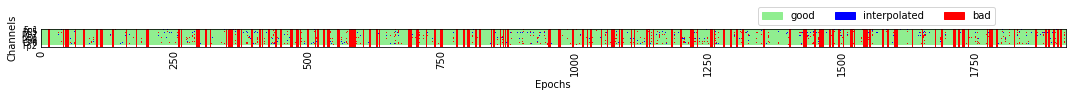

---------- int25-left-good -------------
---------- int25-left-bad -------------
---------- int25-right-good -------------
---------- int25-right-bad -------------
---------- int75-left-good -------------
---------- int75-left-bad -------------
---------- int75-right-good -------------
---------- int75-right-bad -------------
---------- no_int25-left-good -------------
---------- no_int25-left-bad -------------
---------- no_int25-right-good -------------
---------- no_int25-right-bad -------------
---------- no_int75-left-good -------------
---------- no_int75-left-bad -------------
---------- no_int75-right-good -------------
---------- no_int75-right-bad -------------
====================== /EPOCHING ======================
[5_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-good: 0.974155064867666
[5_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-bad: 1.956648550232637
[5_Int3_2017.vhdr] Adding Mean CDA Amp for int25-right-good: -1.6342516122276631
[5_Int3_2017.vhdr] Adding Me

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyqui

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:2.0, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1898 matching events found


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1898 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1898 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1898 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1898 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1898 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/1898 [00:00<?,       ?it/s]

Dropped 389 epochs: 3, 8, 12, 14, 23, 26, 29, 31, 37, 42, 43, 45, 47, 49, 58, 73, 75, 77, 80, 88, 90, 99, 103, 113, 145, 155, 158, 160, 162, 165, 176, 183, 189, 194, 195, 196, 197, 207, 209, 214, 217, 221, 224, 293, 306, 307, 321, 327, 334, 335, 345, 352, 355, 356, 360, 364, 375, 378, 379, 389, 394, 400, 404, 412, 413, 416, 425, 437, 438, 439, 442, 453, 473, 489, 493, 504, 509, 513, 530, 537, 538, 551, 555, 558, 571, 574, 575, 576, 584, 616, 620, 647, 660, 668, 670, 678, 688, 693, 715, 719, 731, 733, 746, 755, 761, 765, 771, 786, 789, 795, 827, 835, 841, 852, 857, 860, 861, 868, 869, 872, 878, 886, 892, 902, 909, 911, 916, 918, 923, 929, 931, 955, 966, 967, 968, 974, 977, 978, 983, 984, 992, 993, 996, 998, 1007, 1013, 1017, 1019, 1021, 1022, 1024, 1026, 1028, 1030, 1032, 1037, 1038, 1040, 1041, 1050, 1070, 1071, 1072, 1074, 1078, 1081, 1082, 1083, 1086, 1092, 1101, 1102, 1105, 1110, 1113, 1114, 1115, 1127, 1130, 1142, 1145, 1153, 1154, 1156, 1157, 1158, 1160, 1164, 1165, 1169, 1173, 11

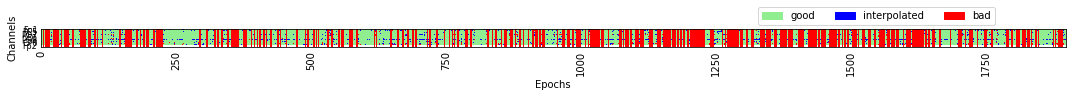

---------- int25-left-good -------------
---------- int25-left-bad -------------
---------- int25-right-good -------------
---------- int25-right-bad -------------
---------- int75-left-good -------------
---------- int75-left-bad -------------
---------- int75-right-good -------------
---------- int75-right-bad -------------
---------- no_int25-left-good -------------
---------- no_int25-left-bad -------------
---------- no_int25-right-good -------------
---------- no_int25-right-bad -------------
---------- no_int75-left-good -------------
---------- no_int75-left-bad -------------
---------- no_int75-right-good -------------
---------- no_int75-right-bad -------------
====================== /EPOCHING ======================
[6_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-good: -0.936088439670175
[6_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-bad: 0.9779398495765745
[6_Int3_2017.vhdr] Adding Mean CDA Amp for int25-right-good: -0.7331135276318644
[6_Int3_2017.vhdr] Adding 

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of E

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:2.0, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1920 matching events found


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1920 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

Dropped 244 epochs: 3, 7, 9, 20, 24, 26, 27, 37, 39, 41, 79, 81, 86, 88, 89, 91, 93, 95, 113, 118, 150, 152, 153, 174, 193, 194, 213, 221, 227, 229, 233, 251, 253, 254, 278, 286, 288, 294, 295, 308, 312, 329, 347, 348, 363, 365, 369, 371, 374, 376, 377, 383, 397, 403, 412, 413, 418, 452, 460, 463, 483, 485, 498, 499, 507, 539, 549, 553, 560, 563, 577, 579, 592, 596, 599, 611, 614, 616, 637, 650, 652, 674, 711, 733, 735, 739, 740, 763, 767, 768, 771, 780, 792, 827, 841, 854, 855, 856, 861, 867, 897, 905, 910, 914, 924, 929, 932, 946, 949, 953, 956, 966, 980, 991, 1004, 1007, 1018, 1033, 1040, 1052, 1054, 1057, 1062, 1075, 1080, 1083, 1102, 1109, 1112, 1122, 1123, 1124, 1141, 1142, 1148, 1152, 1164, 1168, 1190, 1201, 1202, 1210, 1213, 1215, 1216, 1218, 1226, 1232, 1237, 1262, 1265, 1272, 1281, 1282, 1284, 1285, 1286, 1300, 1301, 1309, 1311, 1317, 1322, 1335, 1342, 1347, 1359, 1362, 1363, 1374, 1382, 1387, 1388, 1391, 1407, 1410, 1420, 1426, 1428, 1435, 1441, 1448, 1450, 1457, 1467, 1472,

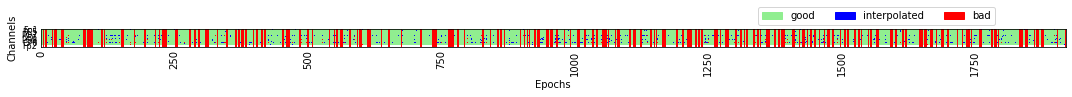

---------- int25-left-good -------------
---------- int25-left-bad -------------
---------- int25-right-good -------------
---------- int25-right-bad -------------
---------- int75-left-good -------------
---------- int75-left-bad -------------
---------- int75-right-good -------------
---------- int75-right-bad -------------
---------- no_int25-left-good -------------
---------- no_int25-left-bad -------------
---------- no_int25-right-good -------------
---------- no_int25-right-bad -------------
---------- no_int75-left-good -------------
---------- no_int75-left-bad -------------
---------- no_int75-right-good -------------
---------- no_int75-right-bad -------------
====================== /EPOCHING ======================
[7_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-good: 3.3530147233425383
[7_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-bad: 1.3483368323027747
[7_Int3_2017.vhdr] Adding Mean CDA Amp for int25-right-good: -2.042772889847285
[7_Int3_2017.vhdr] Adding M

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of E

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:2.0, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1920 matching events found


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1920 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=1


  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

Dropped 237 epochs: 19, 34, 39, 58, 60, 73, 77, 78, 111, 112, 116, 119, 169, 170, 187, 206, 207, 219, 247, 248, 258, 271, 287, 299, 303, 309, 312, 320, 327, 336, 343, 344, 345, 346, 350, 353, 357, 362, 363, 365, 366, 381, 389, 397, 400, 408, 413, 424, 425, 428, 429, 433, 437, 441, 442, 449, 453, 461, 463, 464, 465, 466, 475, 480, 485, 487, 491, 492, 493, 495, 497, 498, 499, 519, 522, 523, 525, 528, 534, 543, 546, 564, 571, 572, 573, 580, 592, 593, 624, 636, 638, 650, 664, 672, 682, 692, 693, 704, 706, 710, 726, 729, 737, 759, 785, 790, 792, 808, 812, 819, 831, 840, 843, 844, 845, 848, 849, 851, 858, 865, 866, 882, 910, 924, 927, 933, 934, 1000, 1032, 1051, 1058, 1075, 1088, 1093, 1094, 1113, 1121, 1129, 1130, 1131, 1132, 1144, 1146, 1147, 1158, 1161, 1165, 1166, 1170, 1175, 1185, 1186, 1187, 1194, 1211, 1225, 1227, 1242, 1249, 1253, 1257, 1260, 1262, 1271, 1279, 1284, 1285, 1288, 1295, 1299, 1355, 1383, 1405, 1406, 1417, 1424, 1436, 1438, 1470, 1480, 1491, 1498, 1499, 1501, 1525, 1533,

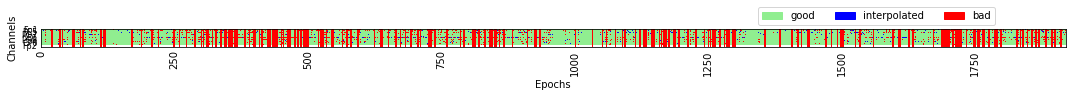

---------- int25-left-good -------------
---------- int25-left-bad -------------
---------- int25-right-good -------------
---------- int25-right-bad -------------
---------- int75-left-good -------------
---------- int75-left-bad -------------
---------- int75-right-good -------------
---------- int75-right-bad -------------
---------- no_int25-left-good -------------
---------- no_int25-left-bad -------------
---------- no_int25-right-good -------------
---------- no_int25-right-bad -------------
---------- no_int75-left-good -------------
---------- no_int75-left-bad -------------
---------- no_int75-right-good -------------
---------- no_int75-right-bad -------------
====================== /EPOCHING ======================
[8_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-good: -0.8738631965233468
[8_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-bad: -0.13764688458185353
[8_Int3_2017.vhdr] Adding Mean CDA Amp for int25-right-good: 0.6355024641148455
[8_Int3_2017.vhdr] Addin

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of E

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:2.0, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1920 matching events found


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1920 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

Dropped 186 epochs: 4, 10, 11, 27, 58, 70, 71, 73, 75, 79, 81, 94, 95, 97, 100, 112, 117, 136, 152, 174, 188, 189, 192, 196, 234, 237, 257, 268, 272, 277, 298, 308, 340, 342, 402, 404, 406, 407, 410, 427, 459, 466, 478, 479, 483, 484, 492, 498, 502, 509, 518, 532, 535, 538, 569, 572, 580, 604, 623, 647, 699, 715, 731, 752, 761, 763, 765, 772, 773, 775, 777, 781, 785, 798, 829, 830, 840, 852, 882, 891, 892, 925, 930, 931, 946, 952, 962, 984, 989, 992, 998, 1002, 1003, 1005, 1032, 1045, 1090, 1092, 1181, 1186, 1194, 1200, 1209, 1211, 1216, 1218, 1221, 1224, 1228, 1235, 1261, 1268, 1276, 1288, 1307, 1309, 1316, 1333, 1342, 1351, 1369, 1372, 1384, 1385, 1386, 1388, 1391, 1392, 1393, 1408, 1414, 1415, 1418, 1428, 1443, 1445, 1447, 1451, 1456, 1482, 1524, 1529, 1530, 1547, 1555, 1562, 1563, 1575, 1579, 1588, 1606, 1608, 1609, 1610, 1618, 1643, 1647, 1671, 1672, 1687, 1690, 1693, 1697, 1699, 1719, 1727, 1739, 1743, 1744, 1757, 1761, 1788, 1790, 1791, 1792, 1803, 1804, 1812, 1813, 1831, 1841, 

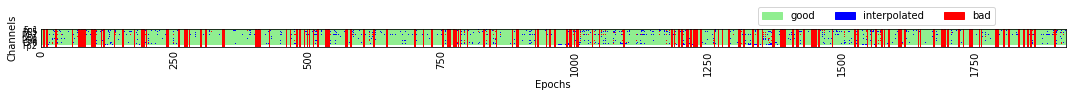

---------- int25-left-good -------------
---------- int25-left-bad -------------
---------- int25-right-good -------------
---------- int25-right-bad -------------
---------- int75-left-good -------------
---------- int75-left-bad -------------
---------- int75-right-good -------------
---------- int75-right-bad -------------
---------- no_int25-left-good -------------
---------- no_int25-left-bad -------------
---------- no_int25-right-good -------------
---------- no_int25-right-bad -------------
---------- no_int75-left-good -------------
---------- no_int75-left-bad -------------
---------- no_int75-right-good -------------
---------- no_int75-right-bad -------------
====================== /EPOCHING ======================
[9_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-good: 1.0380385291640046
[9_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-bad: -0.18751753814591937
[9_Int3_2017.vhdr] Adding Mean CDA Amp for int25-right-good: 1.7518517137306167
[9_Int3_2017.vhdr] Adding

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyqui

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:2.0, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1920 matching events found


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1920 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

Dropped 338 epochs: 9, 13, 15, 16, 20, 28, 29, 30, 34, 43, 44, 45, 47, 49, 54, 65, 66, 70, 71, 72, 74, 83, 95, 98, 107, 109, 112, 114, 117, 124, 125, 126, 136, 147, 148, 149, 155, 159, 161, 162, 166, 168, 169, 170, 179, 186, 188, 189, 190, 191, 192, 194, 199, 202, 206, 212, 219, 225, 228, 232, 259, 280, 292, 317, 321, 341, 354, 361, 368, 377, 396, 413, 421, 422, 424, 433, 442, 447, 452, 457, 463, 467, 470, 471, 473, 481, 484, 488, 502, 529, 545, 549, 559, 577, 578, 579, 585, 586, 595, 599, 624, 657, 699, 704, 705, 723, 729, 758, 763, 785, 792, 797, 800, 802, 816, 824, 825, 826, 874, 890, 895, 907, 915, 933, 937, 941, 942, 944, 946, 953, 958, 969, 973, 976, 986, 993, 997, 1000, 1006, 1007, 1008, 1012, 1013, 1016, 1017, 1024, 1026, 1027, 1036, 1038, 1039, 1041, 1042, 1047, 1053, 1055, 1056, 1057, 1066, 1067, 1068, 1078, 1080, 1088, 1090, 1091, 1095, 1097, 1098, 1101, 1104, 1108, 1109, 1110, 1112, 1115, 1118, 1120, 1124, 1128, 1133, 1135, 1136, 1137, 1139, 1141, 1149, 1153, 1154, 1156, 11

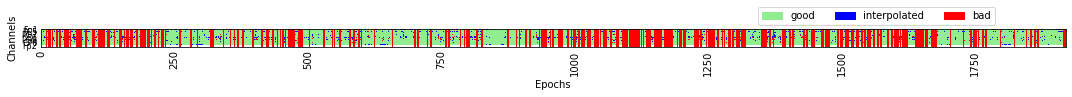

---------- int25-left-good -------------
---------- int25-left-bad -------------
---------- int25-right-good -------------
---------- int25-right-bad -------------
---------- int75-left-good -------------
---------- int75-left-bad -------------
---------- int75-right-good -------------
---------- int75-right-bad -------------
---------- no_int25-left-good -------------
---------- no_int25-left-bad -------------
---------- no_int25-right-good -------------
---------- no_int25-right-bad -------------
---------- no_int75-left-good -------------
---------- no_int75-left-bad -------------
---------- no_int75-right-good -------------
---------- no_int75-right-bad -------------
====================== /EPOCHING ======================
[10_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-good: 0.7547045964450471
[10_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-bad: 0.46838430529805564
[10_Int3_2017.vhdr] Adding Mean CDA Amp for int25-right-good: -0.4173207749401055
[10_Int3_2017.vhdr] Ad

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:2.0, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1920 matching events found


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1920 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

Dropped 362 epochs: 7, 28, 31, 34, 43, 63, 84, 107, 113, 146, 148, 154, 156, 166, 182, 188, 203, 204, 210, 215, 217, 234, 244, 245, 247, 254, 269, 277, 292, 301, 304, 310, 311, 312, 318, 324, 326, 333, 335, 338, 342, 348, 350, 351, 364, 371, 372, 373, 375, 377, 384, 385, 388, 396, 399, 400, 401, 402, 411, 413, 415, 421, 424, 436, 446, 452, 457, 458, 461, 466, 475, 476, 482, 487, 495, 496, 500, 506, 512, 515, 520, 535, 540, 542, 544, 557, 559, 561, 575, 576, 577, 582, 587, 601, 605, 607, 616, 622, 629, 633, 634, 635, 636, 637, 642, 657, 660, 663, 680, 685, 691, 694, 695, 696, 700, 703, 706, 708, 713, 717, 719, 723, 730, 731, 732, 740, 746, 750, 757, 760, 763, 769, 772, 773, 774, 775, 779, 781, 782, 786, 792, 805, 808, 811, 812, 817, 818, 832, 838, 852, 857, 858, 859, 860, 863, 864, 867, 870, 873, 879, 881, 886, 890, 893, 898, 900, 903, 906, 908, 911, 913, 919, 922, 928, 930, 936, 950, 954, 956, 980, 983, 992, 1026, 1028, 1045, 1050, 1054, 1057, 1060, 1069, 1073, 1075, 1092, 1093, 1101, 

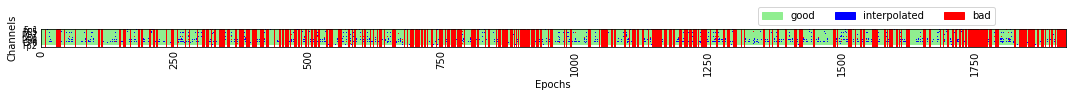

---------- int25-left-good -------------
---------- int25-left-bad -------------
---------- int25-right-good -------------
---------- int25-right-bad -------------
---------- int75-left-good -------------
---------- int75-left-bad -------------
---------- int75-right-good -------------
---------- int75-right-bad -------------
---------- no_int25-left-good -------------
---------- no_int25-left-bad -------------
---------- no_int25-right-good -------------
---------- no_int25-right-bad -------------
---------- no_int75-left-good -------------
---------- no_int75-left-bad -------------
---------- no_int75-right-good -------------
---------- no_int75-right-bad -------------
====================== /EPOCHING ======================
[13_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-good: -1.007193776732572
[13_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-bad: -0.24375808643462424
[13_Int3_2017.vhdr] Adding Mean CDA Amp for int25-right-good: 0.7364242732606682
[13_Int3_2017.vhdr] Ad

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of E

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:2.0, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1920 matching events found


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1920 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.10 and n_interpolate=1


  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

Dropped 442 epochs: 13, 17, 18, 19, 20, 23, 27, 32, 33, 37, 38, 49, 65, 69, 70, 74, 75, 77, 78, 80, 82, 91, 101, 102, 103, 104, 117, 118, 120, 121, 127, 133, 134, 135, 141, 147, 160, 161, 164, 166, 179, 188, 200, 210, 213, 215, 216, 224, 228, 233, 234, 236, 239, 240, 249, 252, 267, 268, 269, 278, 292, 298, 301, 303, 314, 315, 317, 318, 338, 340, 343, 345, 348, 349, 350, 351, 356, 358, 369, 374, 376, 377, 378, 381, 383, 390, 391, 392, 394, 401, 402, 403, 405, 406, 410, 414, 420, 424, 428, 435, 437, 440, 442, 443, 444, 446, 449, 459, 474, 477, 478, 479, 484, 499, 507, 510, 512, 513, 516, 518, 521, 523, 524, 528, 530, 535, 539, 540, 544, 555, 556, 558, 565, 566, 568, 569, 570, 573, 576, 581, 582, 585, 597, 598, 599, 600, 603, 612, 621, 625, 633, 647, 655, 661, 669, 686, 693, 698, 700, 706, 708, 711, 717, 724, 731, 732, 733, 741, 743, 748, 749, 751, 754, 755, 756, 760, 761, 763, 767, 777, 778, 780, 783, 791, 799, 800, 808, 809, 812, 830, 836, 842, 845, 856, 861, 873, 874, 875, 887, 891, 90

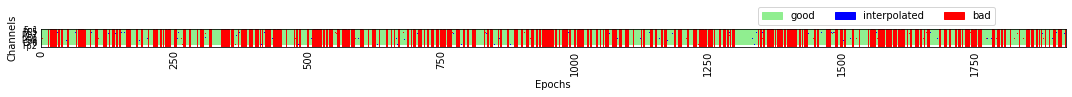

---------- int25-left-good -------------
---------- int25-left-bad -------------
---------- int25-right-good -------------
---------- int25-right-bad -------------
---------- int75-left-good -------------
---------- int75-left-bad -------------
---------- int75-right-good -------------
---------- int75-right-bad -------------
---------- no_int25-left-good -------------
---------- no_int25-left-bad -------------
---------- no_int25-right-good -------------
---------- no_int25-right-bad -------------
---------- no_int75-left-good -------------
---------- no_int75-left-bad -------------
---------- no_int75-right-good -------------
---------- no_int75-right-bad -------------
====================== /EPOCHING ======================
[14_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-good: 1.80819205499976
[14_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-bad: 2.1909954184919127
[14_Int3_2017.vhdr] Adding Mean CDA Amp for int25-right-good: -0.3705890294934803
[14_Int3_2017.vhdr] Addin

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyqui

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:2.0, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1760 matching events found


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1760 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1760 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1760 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1760 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1760 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/1760 [00:00<?,       ?it/s]

Dropped 193 epochs: 2, 13, 18, 39, 51, 52, 55, 86, 105, 108, 124, 127, 143, 144, 153, 160, 172, 174, 189, 193, 195, 213, 232, 287, 300, 310, 312, 313, 323, 331, 354, 379, 400, 417, 429, 445, 462, 487, 488, 492, 498, 540, 552, 631, 657, 662, 669, 671, 742, 756, 778, 780, 783, 787, 805, 812, 844, 848, 866, 872, 886, 894, 922, 926, 927, 955, 959, 967, 972, 978, 979, 982, 991, 992, 995, 1008, 1015, 1020, 1021, 1023, 1028, 1032, 1035, 1036, 1040, 1047, 1060, 1073, 1079, 1083, 1087, 1088, 1089, 1091, 1093, 1094, 1103, 1105, 1108, 1124, 1131, 1137, 1149, 1150, 1151, 1154, 1155, 1163, 1171, 1175, 1179, 1183, 1188, 1192, 1202, 1203, 1205, 1210, 1211, 1214, 1217, 1219, 1226, 1250, 1253, 1260, 1262, 1264, 1276, 1289, 1299, 1304, 1308, 1309, 1323, 1327, 1348, 1351, 1352, 1353, 1354, 1358, 1377, 1379, 1380, 1383, 1384, 1393, 1394, 1405, 1410, 1411, 1418, 1420, 1423, 1424, 1425, 1426, 1432, 1436, 1438, 1452, 1457, 1458, 1459, 1464, 1467, 1468, 1474, 1479, 1485, 1487, 1513, 1515, 1518, 1552, 1555, 15

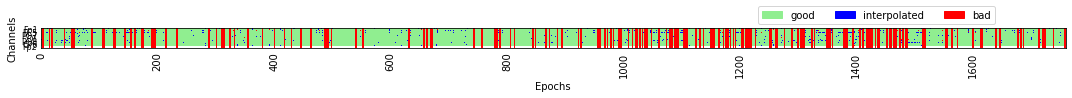

---------- int25-left-good -------------
---------- int25-left-bad -------------
---------- int25-right-good -------------
---------- int25-right-bad -------------
---------- int75-left-good -------------
---------- int75-left-bad -------------
---------- int75-right-good -------------
---------- int75-right-bad -------------
---------- no_int25-left-good -------------
---------- no_int25-left-bad -------------
---------- no_int25-right-good -------------
---------- no_int25-right-bad -------------
---------- no_int75-left-good -------------
---------- no_int75-left-bad -------------
---------- no_int75-right-good -------------
---------- no_int75-right-bad -------------
====================== /EPOCHING ======================
[15_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-good: -3.3818636447326176
[15_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-bad: -2.4662091510445454
[15_Int3_2017.vhdr] Adding Mean CDA Amp for int25-right-good: 0.902746217577996
[15_Int3_2017.vhdr] Add

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyqui

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:2.0, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1920 matching events found


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1920 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

Dropped 152 epochs: 46, 84, 88, 106, 112, 121, 124, 149, 171, 174, 175, 181, 201, 224, 225, 270, 295, 314, 317, 321, 339, 352, 364, 365, 380, 392, 394, 396, 400, 401, 405, 409, 428, 459, 475, 499, 507, 511, 522, 534, 537, 544, 545, 548, 564, 571, 615, 620, 629, 639, 644, 654, 658, 675, 690, 693, 699, 707, 709, 710, 712, 715, 719, 723, 725, 736, 739, 741, 754, 759, 765, 767, 786, 795, 848, 874, 887, 915, 936, 950, 970, 973, 986, 998, 1084, 1144, 1147, 1149, 1151, 1154, 1157, 1158, 1162, 1167, 1193, 1197, 1231, 1282, 1297, 1300, 1302, 1303, 1309, 1311, 1317, 1320, 1335, 1395, 1413, 1448, 1480, 1509, 1526, 1529, 1535, 1543, 1569, 1584, 1588, 1598, 1606, 1626, 1639, 1649, 1655, 1656, 1675, 1688, 1693, 1709, 1720, 1751, 1771, 1773, 1774, 1776, 1777, 1780, 1785, 1794, 1797, 1809, 1818, 1824, 1829, 1839, 1852, 1870, 1873, 1897, 1899, 1903


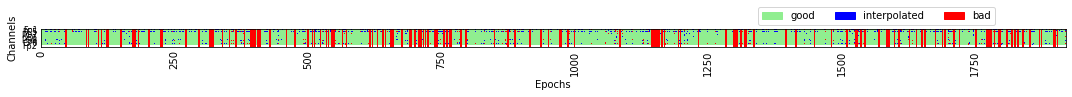

---------- int25-left-good -------------
---------- int25-left-bad -------------
---------- int25-right-good -------------
---------- int25-right-bad -------------
---------- int75-left-good -------------
---------- int75-left-bad -------------
---------- int75-right-good -------------
---------- int75-right-bad -------------
---------- no_int25-left-good -------------
---------- no_int25-left-bad -------------
---------- no_int25-right-good -------------
---------- no_int25-right-bad -------------
---------- no_int75-left-good -------------
---------- no_int75-left-bad -------------
---------- no_int75-right-good -------------
---------- no_int75-right-bad -------------
====================== /EPOCHING ======================
[16_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-good: 2.796562324353093
[16_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-bad: 2.939992017880439
[16_Int3_2017.vhdr] Adding Mean CDA Amp for int25-right-good: -1.8570537114266208
[16_Int3_2017.vhdr] Addin

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of E

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:2.0, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1920 matching events found


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1920 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=1


  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

Dropped 299 epochs: 12, 15, 16, 22, 25, 36, 39, 53, 60, 62, 69, 79, 85, 93, 97, 101, 105, 112, 115, 116, 118, 119, 122, 123, 124, 127, 131, 133, 143, 146, 148, 157, 164, 167, 177, 182, 185, 187, 191, 198, 213, 216, 220, 221, 224, 228, 229, 236, 238, 239, 269, 273, 275, 278, 279, 297, 304, 305, 311, 327, 331, 344, 346, 350, 352, 372, 373, 374, 379, 388, 389, 396, 402, 404, 414, 417, 423, 424, 451, 456, 465, 467, 468, 470, 479, 482, 491, 496, 499, 500, 515, 516, 534, 536, 547, 550, 556, 571, 572, 575, 596, 606, 621, 626, 631, 646, 656, 671, 672, 677, 684, 685, 686, 691, 699, 701, 702, 706, 739, 746, 758, 759, 766, 779, 783, 796, 797, 800, 807, 823, 831, 835, 836, 856, 857, 860, 867, 871, 875, 879, 882, 888, 889, 901, 909, 924, 926, 937, 941, 942, 943, 945, 970, 982, 998, 999, 1001, 1022, 1027, 1033, 1039, 1044, 1045, 1047, 1050, 1052, 1054, 1064, 1070, 1071, 1075, 1078, 1080, 1103, 1109, 1123, 1128, 1129, 1131, 1144, 1155, 1167, 1171, 1175, 1186, 1192, 1194, 1198, 1200, 1207, 1220, 1221,

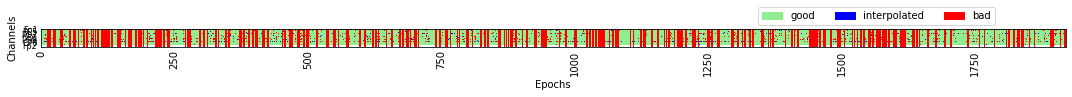

---------- int25-left-good -------------
---------- int25-left-bad -------------
---------- int25-right-good -------------
---------- int25-right-bad -------------
---------- int75-left-good -------------
---------- int75-left-bad -------------
---------- int75-right-good -------------
---------- int75-right-bad -------------
---------- no_int25-left-good -------------
---------- no_int25-left-bad -------------
---------- no_int25-right-good -------------
---------- no_int25-right-bad -------------
---------- no_int75-left-good -------------
---------- no_int75-left-bad -------------
---------- no_int75-right-good -------------
---------- no_int75-right-bad -------------
====================== /EPOCHING ======================
[19_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-good: 0.23214190241150395
[19_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-bad: 1.1747862460469283
[19_Int3_2017.vhdr] Adding Mean CDA Amp for int25-right-good: 0.30190416849954477
[19_Int3_2017.vhdr] Ad

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyqui

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:2.0, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1920 matching events found


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1920 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

Dropped 179 epochs: 1, 7, 16, 18, 24, 39, 45, 46, 81, 90, 103, 127, 133, 134, 139, 148, 149, 159, 161, 163, 164, 200, 201, 203, 206, 209, 229, 232, 246, 247, 250, 251, 263, 269, 290, 295, 332, 349, 372, 384, 391, 395, 422, 432, 443, 452, 460, 497, 507, 509, 515, 520, 525, 533, 537, 569, 572, 574, 583, 660, 704, 709, 746, 751, 757, 761, 779, 788, 798, 800, 805, 808, 813, 836, 848, 854, 855, 874, 889, 907, 915, 939, 950, 976, 978, 981, 1004, 1005, 1010, 1016, 1020, 1031, 1042, 1058, 1067, 1085, 1087, 1094, 1101, 1150, 1185, 1190, 1206, 1209, 1212, 1221, 1233, 1241, 1247, 1252, 1254, 1256, 1257, 1286, 1290, 1293, 1306, 1309, 1322, 1323, 1327, 1329, 1332, 1333, 1335, 1337, 1348, 1351, 1353, 1361, 1376, 1380, 1382, 1383, 1396, 1401, 1402, 1403, 1461, 1469, 1505, 1512, 1513, 1534, 1552, 1555, 1559, 1561, 1562, 1572, 1574, 1576, 1586, 1615, 1649, 1659, 1668, 1673, 1678, 1692, 1699, 1704, 1705, 1715, 1716, 1718, 1740, 1745, 1772, 1778, 1800, 1807, 1813, 1817, 1848, 1862, 1893, 1900, 1912


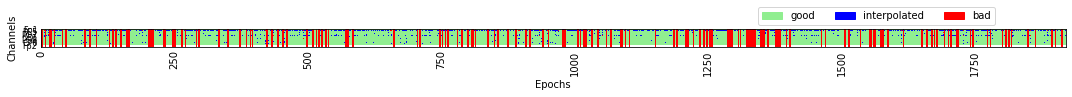

---------- int25-left-good -------------
---------- int25-left-bad -------------
---------- int25-right-good -------------
---------- int25-right-bad -------------
---------- int75-left-good -------------
---------- int75-left-bad -------------
---------- int75-right-good -------------
---------- int75-right-bad -------------
---------- no_int25-left-good -------------
---------- no_int25-left-bad -------------
---------- no_int25-right-good -------------
---------- no_int25-right-bad -------------
---------- no_int75-left-good -------------
---------- no_int75-left-bad -------------
---------- no_int75-right-good -------------
---------- no_int75-right-bad -------------
====================== /EPOCHING ======================
[20_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-good: 2.744867639936285
[20_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-bad: 3.4312318794726626
[20_Int3_2017.vhdr] Adding Mean CDA Amp for int25-right-good: -2.5350477808419147
[20_Int3_2017.vhdr] Addi

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyqui

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:2.0, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1920 matching events found


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1920 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.10 and n_interpolate=1


  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

Dropped 337 epochs: 5, 6, 12, 30, 32, 37, 42, 44, 49, 52, 61, 73, 77, 80, 86, 89, 93, 105, 112, 113, 114, 117, 120, 121, 122, 133, 135, 139, 147, 148, 160, 162, 171, 177, 179, 187, 191, 194, 195, 199, 203, 231, 232, 235, 237, 239, 244, 250, 252, 255, 263, 269, 271, 287, 291, 292, 298, 310, 315, 317, 319, 320, 321, 333, 338, 340, 344, 347, 359, 375, 383, 384, 391, 393, 394, 396, 398, 400, 403, 407, 410, 416, 417, 428, 435, 437, 438, 439, 440, 450, 451, 452, 453, 455, 464, 470, 473, 475, 478, 481, 486, 491, 493, 494, 495, 496, 501, 503, 516, 520, 532, 557, 566, 569, 573, 574, 585, 588, 598, 614, 617, 618, 629, 631, 634, 636, 640, 642, 643, 651, 652, 662, 673, 681, 685, 686, 694, 696, 708, 723, 726, 729, 733, 756, 760, 765, 766, 777, 778, 780, 781, 784, 789, 806, 812, 813, 814, 822, 824, 831, 837, 838, 841, 849, 852, 853, 854, 867, 869, 873, 881, 885, 888, 895, 899, 904, 905, 908, 915, 917, 918, 920, 921, 925, 930, 935, 936, 937, 943, 945, 955, 956, 1017, 1034, 1035, 1057, 1069, 1075, 108

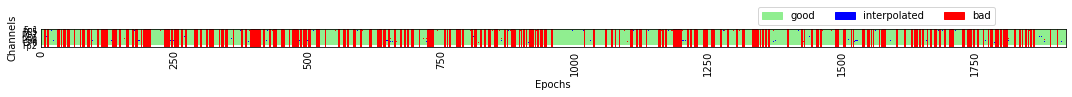

---------- int25-left-good -------------
---------- int25-left-bad -------------
---------- int25-right-good -------------
---------- int25-right-bad -------------
---------- int75-left-good -------------
---------- int75-left-bad -------------
---------- int75-right-good -------------
---------- int75-right-bad -------------
---------- no_int25-left-good -------------
---------- no_int25-left-bad -------------
---------- no_int25-right-good -------------
---------- no_int25-right-bad -------------
---------- no_int75-left-good -------------
---------- no_int75-left-bad -------------
---------- no_int75-right-good -------------
---------- no_int75-right-bad -------------
====================== /EPOCHING ======================
[21_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-good: -4.412084689672218
[21_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-bad: -2.9503105331257737
[21_Int3_2017.vhdr] Adding Mean CDA Amp for int25-right-good: 3.7306802692462724
[21_Int3_2017.vhdr] Add

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyqui

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:2.0, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1920 matching events found


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1920 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.90 and n_interpolate=4


  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

Dropped 6 epochs: 226, 456, 1121, 1312, 1477, 1873


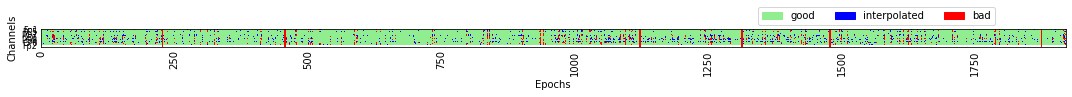

---------- int25-left-good -------------
---------- int25-left-bad -------------
---------- int25-right-good -------------
---------- int25-right-bad -------------
---------- int75-left-good -------------
---------- int75-left-bad -------------
---------- int75-right-good -------------
---------- int75-right-bad -------------
---------- no_int25-left-good -------------
---------- no_int25-left-bad -------------
---------- no_int25-right-good -------------
---------- no_int25-right-bad -------------
---------- no_int75-left-good -------------
---------- no_int75-left-bad -------------
---------- no_int75-right-good -------------
---------- no_int75-right-bad -------------
====================== /EPOCHING ======================
[22_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-good: 0.41419124089895426
[22_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-bad: 0.31291604590312644
[22_Int3_2017.vhdr] Adding Mean CDA Amp for int25-right-good: 0.17297842522766108
[22_Int3_2017.vhdr] A

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyqui

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:2.0, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1920 matching events found


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1920 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

Dropped 157 epochs: 0, 1, 3, 35, 41, 62, 67, 76, 77, 82, 91, 98, 105, 112, 113, 123, 126, 148, 149, 158, 170, 181, 184, 185, 190, 191, 192, 220, 221, 234, 260, 262, 281, 301, 325, 343, 346, 367, 371, 375, 393, 398, 414, 419, 424, 434, 439, 457, 467, 479, 487, 499, 528, 560, 562, 563, 574, 579, 585, 589, 604, 651, 653, 665, 677, 682, 685, 695, 697, 700, 702, 703, 715, 717, 718, 736, 739, 755, 760, 765, 788, 793, 803, 805, 819, 838, 840, 843, 859, 861, 886, 888, 891, 906, 913, 914, 917, 920, 923, 925, 926, 945, 946, 957, 961, 1001, 1007, 1042, 1054, 1080, 1083, 1097, 1127, 1142, 1143, 1189, 1202, 1266, 1271, 1288, 1293, 1304, 1317, 1322, 1342, 1360, 1376, 1431, 1435, 1437, 1439, 1441, 1448, 1467, 1481, 1483, 1496, 1532, 1561, 1565, 1577, 1602, 1604, 1616, 1629, 1641, 1648, 1661, 1677, 1740, 1761, 1836, 1845, 1847, 1882, 1890, 1916


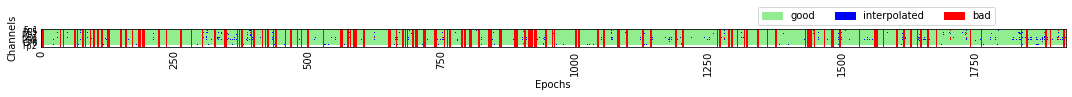

---------- int25-left-good -------------
---------- int25-left-bad -------------
---------- int25-right-good -------------
---------- int25-right-bad -------------
---------- int75-left-good -------------
---------- int75-left-bad -------------
---------- int75-right-good -------------
---------- int75-right-bad -------------
---------- no_int25-left-good -------------
---------- no_int25-left-bad -------------
---------- no_int25-right-good -------------
---------- no_int25-right-bad -------------
---------- no_int75-left-good -------------
---------- no_int75-left-bad -------------
---------- no_int75-right-good -------------
---------- no_int75-right-bad -------------
====================== /EPOCHING ======================
[24_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-good: 2.0283015885826985
[24_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-bad: 0.7685060454364262
[24_Int3_2017.vhdr] Adding Mean CDA Amp for int25-right-good: -2.0176112947304907
[24_Int3_2017.vhdr] Add

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyqui

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:2.0, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1920 matching events found


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1920 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=1


  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

Dropped 180 epochs: 3, 4, 8, 10, 19, 31, 42, 50, 68, 69, 79, 82, 86, 97, 114, 122, 134, 150, 168, 169, 175, 196, 197, 223, 230, 238, 300, 366, 369, 392, 423, 445, 464, 469, 472, 508, 532, 551, 572, 576, 593, 684, 696, 741, 744, 754, 760, 786, 795, 817, 831, 899, 905, 932, 933, 938, 940, 942, 965, 985, 995, 997, 1002, 1003, 1007, 1008, 1019, 1020, 1031, 1032, 1035, 1036, 1042, 1058, 1061, 1085, 1093, 1100, 1103, 1117, 1128, 1129, 1131, 1133, 1135, 1141, 1145, 1147, 1183, 1186, 1194, 1196, 1205, 1206, 1221, 1223, 1224, 1226, 1235, 1238, 1242, 1243, 1244, 1257, 1259, 1283, 1293, 1300, 1312, 1315, 1316, 1319, 1339, 1346, 1351, 1358, 1372, 1373, 1382, 1383, 1384, 1387, 1389, 1400, 1404, 1415, 1421, 1432, 1436, 1437, 1457, 1467, 1483, 1487, 1488, 1489, 1491, 1494, 1498, 1500, 1507, 1512, 1523, 1526, 1536, 1547, 1557, 1559, 1569, 1572, 1585, 1593, 1594, 1600, 1614, 1615, 1618, 1630, 1644, 1651, 1652, 1660, 1662, 1663, 1669, 1671, 1672, 1676, 1708, 1735, 1741, 1743, 1751, 1784, 1787, 1863, 186

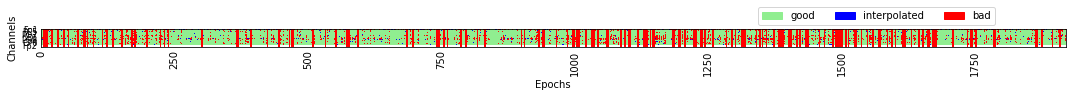

---------- int25-left-good -------------
---------- int25-left-bad -------------
---------- int25-right-good -------------
---------- int25-right-bad -------------
---------- int75-left-good -------------
---------- int75-left-bad -------------
---------- int75-right-good -------------
---------- int75-right-bad -------------
---------- no_int25-left-good -------------
---------- no_int25-left-bad -------------
---------- no_int25-right-good -------------
---------- no_int25-right-bad -------------
---------- no_int75-left-good -------------
---------- no_int75-left-bad -------------
---------- no_int75-right-good -------------
---------- no_int75-right-bad -------------
====================== /EPOCHING ======================
[26_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-good: 2.0269116464958454
[26_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-bad: 1.4027508721859
[26_Int3_2017.vhdr] Adding Mean CDA Amp for int25-right-good: -0.4552135175687872
[26_Int3_2017.vhdr] Adding

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyqui

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:2.0, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1920 matching events found


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1920 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

Dropped 259 epochs: 5, 11, 15, 17, 22, 24, 30, 33, 36, 46, 49, 54, 55, 57, 58, 66, 67, 68, 72, 75, 79, 81, 82, 83, 88, 91, 95, 100, 101, 103, 105, 106, 112, 117, 125, 139, 156, 158, 165, 167, 171, 180, 185, 194, 197, 201, 204, 208, 210, 227, 230, 234, 236, 238, 288, 335, 347, 360, 364, 388, 435, 440, 472, 473, 497, 501, 505, 517, 529, 533, 538, 539, 546, 548, 553, 557, 580, 597, 598, 658, 676, 681, 682, 685, 694, 711, 715, 723, 738, 773, 781, 784, 789, 816, 819, 820, 829, 861, 868, 869, 870, 882, 883, 895, 915, 931, 938, 945, 948, 958, 963, 965, 969, 970, 980, 982, 988, 1010, 1011, 1012, 1025, 1039, 1043, 1044, 1058, 1063, 1065, 1080, 1082, 1087, 1091, 1092, 1093, 1094, 1097, 1104, 1106, 1107, 1114, 1118, 1122, 1124, 1143, 1151, 1163, 1166, 1174, 1175, 1181, 1184, 1189, 1196, 1200, 1202, 1208, 1211, 1217, 1221, 1222, 1225, 1232, 1235, 1248, 1251, 1258, 1260, 1262, 1265, 1269, 1270, 1273, 1276, 1283, 1286, 1288, 1289, 1302, 1304, 1307, 1312, 1314, 1318, 1326, 1328, 1331, 1332, 1336, 134

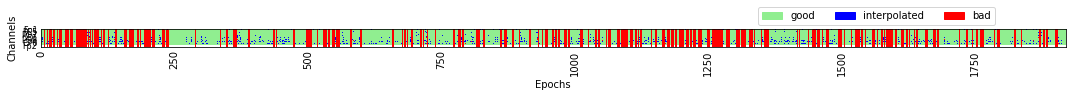

---------- int25-left-good -------------
---------- int25-left-bad -------------
---------- int25-right-good -------------
---------- int25-right-bad -------------
---------- int75-left-good -------------
---------- int75-left-bad -------------
---------- int75-right-good -------------
---------- int75-right-bad -------------
---------- no_int25-left-good -------------
---------- no_int25-left-bad -------------
---------- no_int25-right-good -------------
---------- no_int25-right-bad -------------
---------- no_int75-left-good -------------
---------- no_int75-left-bad -------------
---------- no_int75-right-good -------------
---------- no_int75-right-bad -------------
====================== /EPOCHING ======================
[27_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-good: -10.22834531266098
[27_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-bad: -9.263142271649276
[27_Int3_2017.vhdr] Adding Mean CDA Amp for int25-right-good: 10.77429278550867
[27_Int3_2017.vhdr] Addin

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyqui

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:2.0, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1920 matching events found


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1920 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

Dropped 378 epochs: 6, 7, 13, 18, 23, 27, 35, 45, 48, 52, 72, 73, 75, 76, 78, 79, 80, 82, 85, 100, 106, 111, 112, 113, 118, 126, 134, 162, 170, 176, 183, 204, 209, 216, 218, 221, 224, 225, 233, 234, 235, 247, 248, 249, 250, 251, 252, 253, 254, 256, 258, 259, 260, 271, 278, 281, 282, 283, 288, 290, 291, 295, 297, 300, 302, 312, 321, 322, 323, 325, 327, 337, 345, 352, 355, 356, 362, 365, 366, 369, 376, 379, 380, 382, 383, 386, 390, 393, 397, 398, 402, 407, 408, 411, 412, 415, 418, 419, 422, 430, 432, 434, 442, 443, 465, 470, 472, 473, 484, 499, 522, 523, 525, 530, 532, 545, 547, 551, 552, 556, 561, 562, 564, 565, 567, 571, 572, 575, 578, 579, 581, 586, 587, 588, 591, 607, 610, 614, 617, 618, 621, 622, 627, 630, 633, 638, 646, 660, 661, 662, 677, 678, 693, 697, 701, 702, 721, 722, 730, 735, 738, 740, 741, 743, 745, 746, 747, 748, 749, 754, 755, 758, 761, 762, 764, 772, 773, 775, 777, 780, 801, 813, 820, 821, 824, 837, 838, 840, 841, 842, 851, 852, 854, 856, 857, 862, 868, 871, 872, 873, 8

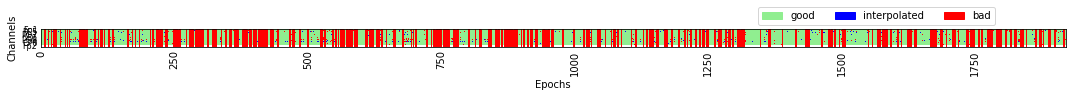

---------- int25-left-good -------------
---------- int25-left-bad -------------
---------- int25-right-good -------------
---------- int25-right-bad -------------
---------- int75-left-good -------------
---------- int75-left-bad -------------
---------- int75-right-good -------------
---------- int75-right-bad -------------
---------- no_int25-left-good -------------
---------- no_int25-left-bad -------------
---------- no_int25-right-good -------------
---------- no_int25-right-bad -------------
---------- no_int75-left-good -------------
---------- no_int75-left-bad -------------
---------- no_int75-right-good -------------
---------- no_int75-right-bad -------------
====================== /EPOCHING ======================
[28_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-good: 0.8591605259553794
[28_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-bad: 1.0274666180408065
[28_Int3_2017.vhdr] Adding Mean CDA Amp for int25-right-good: -0.017759413392607948
[28_Int3_2017.vhdr] A

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyqui

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:2.0, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1920 matching events found


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1920 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/mne/bem.py:967: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

Dropped 98 epochs: 18, 30, 37, 61, 64, 103, 141, 190, 225, 236, 238, 249, 262, 400, 401, 425, 445, 469, 471, 474, 486, 615, 626, 711, 762, 770, 781, 784, 790, 822, 870, 893, 929, 1012, 1019, 1025, 1038, 1048, 1049, 1052, 1053, 1055, 1061, 1084, 1086, 1097, 1109, 1117, 1124, 1152, 1162, 1170, 1173, 1187, 1266, 1275, 1282, 1296, 1298, 1299, 1303, 1316, 1349, 1369, 1382, 1383, 1405, 1412, 1420, 1436, 1445, 1458, 1469, 1486, 1502, 1511, 1521, 1522, 1523, 1524, 1534, 1587, 1597, 1602, 1632, 1637, 1644, 1651, 1661, 1674, 1678, 1687, 1720, 1774, 1780, 1819, 1850, 1913


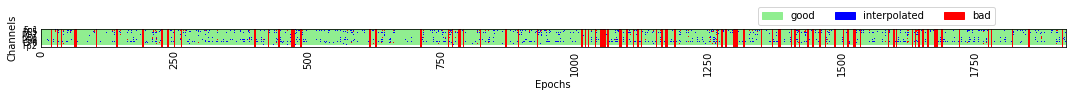

---------- int25-left-good -------------
---------- int25-left-bad -------------
---------- int25-right-good -------------
---------- int25-right-bad -------------
---------- int75-left-good -------------
---------- int75-left-bad -------------
---------- int75-right-good -------------
---------- int75-right-bad -------------
---------- no_int25-left-good -------------
---------- no_int25-left-bad -------------
---------- no_int25-right-good -------------
---------- no_int25-right-bad -------------
---------- no_int75-left-good -------------
---------- no_int75-left-bad -------------
---------- no_int75-right-good -------------
---------- no_int75-right-bad -------------
====================== /EPOCHING ======================
[29_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-good: 1.7525270149752963
[29_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-bad: 2.706849045655291
[29_Int3_2017.vhdr] Adding Mean CDA Amp for int25-right-good: -2.1740890235250596
[29_Int3_2017.vhdr] Addi

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_10435/587168102.py:89: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyqui

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:2.0, baseline=(-0.2, 0)
Not setting metadata
Not setting metadata
1920 matching events found


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 1920 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=1


  0%|          | Repairing epochs : 0/1920 [00:00<?,       ?it/s]

Dropped 18 epochs: 71, 94, 96, 111, 160, 205, 208, 708, 729, 1026, 1092, 1165, 1188, 1390, 1408, 1430, 1485, 1623


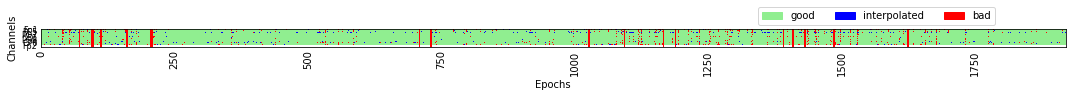

---------- int25-left-good -------------
---------- int25-left-bad -------------
---------- int25-right-good -------------
---------- int25-right-bad -------------
---------- int75-left-good -------------
---------- int75-left-bad -------------
---------- int75-right-good -------------
---------- int75-right-bad -------------
---------- no_int25-left-good -------------
---------- no_int25-left-bad -------------
---------- no_int25-right-good -------------
---------- no_int25-right-bad -------------
---------- no_int75-left-good -------------
---------- no_int75-left-bad -------------
---------- no_int75-right-good -------------
---------- no_int75-right-bad -------------
====================== /EPOCHING ======================
[30_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-good: 5.905319929568403
[30_Int3_2017.vhdr] Adding Mean CDA Amp for int25-left-bad: 5.343686545756384
[30_Int3_2017.vhdr] Adding Mean CDA Amp for int25-right-good: -5.527658203239299
[30_Int3_2017.vhdr] Adding

int25 int75 no_int25 no_int75 left right  good  bad  \
5_Int3_2017.vhdr    240   720      720      240  960   960  1629  291   
6_Int3_2017.vhdr    233   720      705      240  950   948  1074  824   
7_Int3_2017.vhdr    240   720      720      240  960   960  1157  763   
8_Int3_2017.vhdr    240   720      720      240  960   960  1725  195   
9_Int3_2017.vhdr    240   720      720      240  960   960  1152  768   
10_Int3_2017.vhdr   240   720      720      240  960   960  1301  619   
13_Int3_2017.vhdr   240   720      720      240  960   960  1523  397   
14_Int3_2017.vhdr   240   720      720      240  960   960  1040  880   
15_Int3_2017.vhdr   200   720      600      240  880   880  1136  624   
16_Int3_2017.vhdr   240   720      720      240  960   960  1124  796   
19_Int3_2017.vhdr   240   720      720      240  960   960  1620  300   
20_Int3_2017.vhdr   240   720      720      240  960   960  1255  665   
21_Int3_2017.vhdr   240   720      720      240  960   960  1346  574   
22_Int3_2017.vhdr   240   720      720      240  960   960  1439  481   
24_Int3_2017.vhdr   240   720      720      240  960   960  1316  604   
26_Int3_2017.vhdr   240   720      720      240  960   960  1267  653   
27_Int3_2017.vhdr   240   720      720      240  960   960  1739  181   
28_Int3_2017.vhdr   240   720      720      240  960   960  1477  443   
29_Int3_2017.vhdr   240   720      720      240  960   960  1302  618   
30_Int3_2017.vhdr   240   720      720      240  960   960  1147  773   

                  int25-left int25-left-CDA  ... no_int75-right-good  \
5_Int3_2017.vhdr         120              0  ...                 101   
6_Int3_2017.vhdr         117              0  ...                  71   
7_Int3_2017.vhdr         120              0  ...                  73   
8_Int3_2017.vhdr         120              0  ...                 111   
9_Int3_2017.vhdr         120              0  ...                  72   
10_Int3_2017.vhdr        120              0  ...                  76   
13_Int3_2017.vhdr        120              0  ...                  98   
14_Int3_2017.vhdr        120              0  ...                  55   
15_Int3_2017.vhdr        100              0  ...                  89   
16_Int3_2017.vhdr        120              0  ...                  74   
19_Int3_2017.vhdr        120              0  ...                 106   
20_Int3_2017.vhdr        120              0  ...                  71   
21_Int3_2017.vhdr        120              0  ...                  85   
22_Int3_2017.vhdr        120              0  ...                  83   
24_Int3_2017.vhdr        120              0  ...                  87   
26_Int3_2017.vhdr        120              0  ...                  81   
27_Int3_2017.vhdr        120              0  ...                 114   
28_Int3_2017.vhdr        120              0  ...                  99   
29_Int3_2017.vhdr        120              0  ...                  87   
30_Int3_2017.vhdr        120              0  ...                  76   

                  no_int75-right-good-CDA right-good-CDA no_int75-right-bad  \
5_Int3_2017.vhdr                -3.286408      -2.654905                 19   
6_Int3_2017.vhdr                -0.301467      -0.699242                 49   
7_Int3_2017.vhdr                -1.790877      -1.552533                 47   
8_Int3_2017.vhdr                 0.506963       0.413894                  9   
9_Int3_2017.vhdr                  0.18038       0.491036                 48   
10_Int3_2017.vhdr                  1.2283       0.468252                 44   
13_Int3_2017.vhdr                -3.41088      -1.246265                 22   
14_Int3_2017.vhdr                1.812516      -1.116512                 65   
15_Int3_2017.vhdr                1.560111       1.535842                 31   
16_Int3_2017.vhdr               -2.120223      -2.536522                 46   
19_Int3_2017.vhdr               -0.975086      -0.068078                 14   
20_Int3_2017.vhdr      

In [3]:
#==================================================================
# General Variables
#==================================================================
study_id = 'Hakim2020-Exp2'

triggers = dict();

# Normally we would used the 8 triggers above, but it seems like hardware triggers weren't used. Only BEH data.
triggers_all = [11, 12, 21, 22]

# Dictionnaries for BEH file mapping
conds_beh = {1:'no_int25', 2:'int25', 3:'no_int75', 4:'int75'}
sides_beh = {1:'right', 2:'left'}

# Custom Trigger Modified via BEH file. (not real hardware triggers!)
triggers['int25'] = [21, 22] 
triggers['int75'] = [41, 42] 
triggers['no_int25'] = [11, 12]
triggers['no_int75'] = [31, 32]

triggers['left'] = [12, 22, 32, 42] 
triggers['right'] = [11, 21, 31, 41]

triggers['good'] = [91]
triggers['bad'] = [90]

# Labels
conds = ['int25', 'int75', 'no_int25', 'no_int75']
sides = ['left', 'right']
perfs = ['good', 'bad']

# Internal Triggers to Epochs Properly
internal_triggers = dict()
internal_triggers_count = 0
for cond in conds:
    for side in sides:
        for perf in perfs:
            internal_triggers_count = internal_triggers_count + 1
            internal_triggers['{}-{}-{}'.format(cond,side,perf)] = internal_triggers_count
            
# CDA Channels
chan_right = ['PO8']
chan_left = ['PO7']

# Epoc Information
epoch_length = 2.0
epoch_tmin = -0.2
baseline_corr = (-0.2, 0)

# CDA info
#cda_window = (0.45, 0.65) # Window #1
#cda_window2 = (0.8, 1.0)   # Window #2
cda_window = (1.3, 1.5)   # Window #3

# CDA main variable!
cda_dict_all = dict()
epochs_dict_all = dict()
perf_report_all = dict()
report = prep_report(conds, sides, perfs)

#==================================================================
# Main Loop - Loading All Files & Extract CDAs.
#==================================================================
directory_path = '/Volumes/Nick - Data/CDA Datasets/Hakim 2020/Experiment 2/'

# ------------------------
# 0. -- Load BEH File --
# ------------------------
behavfilepath = directory_path + 'Analysis_GrandAverages/allSubsBehData.mat'
mat = mat73.loadmat(behavfilepath)
beh_accs = mat['allsubs']['acc']
beh_conds = mat['allsubs']['cond']
beh_sides = mat['allsubs']['side']
beh_subjects = mat['subjects']

eegfiles = [os.path.join(dirpath, f)
    for dirpath, dirnames, files in os.walk(directory_path)
    for f in files if f.endswith('.vhdr')]

#filepath = directory_path + '5/5_Int3_2017.vhdr'
for subject_id, subject in enumerate(beh_subjects):
    filepath = str(directory_path + 'EegData/' + '{}/{}_Int3_2017.vhdr'.format(int(subject), int(subject)))
    filename = filepath[filepath.rfind('/')+1:]
    print('Processing: ' + filename + '...')

    # ------------------------
    # 1. -- Load File --
    # ------------------------
    raw = read_raw_brainvision(filepath, preload=True)

    # ------------------------
    # 2. -- Preprocessing --
    # ------------------------
    # Set Electrodes Locations - Used Brain Products (locations seem to in eeg file...)
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage)

    preproc = raw

    # Filter
    preproc = preproc.filter(.1, 20., fir_design='firwin', skip_by_annotation='edge')

    # Events
    events = mne.events_from_annotations(preproc)

    # Rework Events based on BEH file.
    event_id = 0
    for e in events[0]:
        if e[2] in triggers_all: # Find relevant trials (events)
            cur_cond = conds_beh[int(beh_conds[subject_id][event_id])]
            cur_side = sides_beh[int(beh_sides[subject_id][event_id])]
            new_trigger = np.intersect1d(triggers[cur_cond], triggers[cur_side])[0]
            e[2] = new_trigger
            #print('Trial #{}: {} & {} -> {}'.format(event_id+1, cur_cond, cur_side, new_trigger))
            event_id = event_id + 1

    # Select Channels (to save time on cleaning)
    #preproc = preproc.pick_channels(chan_right + chan_left)

    # Plot (visual check)
    #preproc.plot(events=events, block=True, lowpass=40)

    # ------------------------
    # 3. -- Epochs --
    # ------------------------    
    specific_events = get_specific_events(events[0], conds, sides, perfs, triggers, internal_triggers)

    epochs_dict = get_epochs(preproc, specific_events, epoch_length, epoch_tmin, baseline_corr, clean=True)

    epochs_dict_all[filename] = epochs_dict

    # times, used for CDA mean amp report.
    times = epochs_dict[conds[0]][sides[0]][perfs[0]].times

    # ------------------------
    # 4. -- CDA --
    # ------------------------
    cda_dict_all[filename] = get_CDA(epochs_dict, conds, sides, perfs, chan_right, chan_left)

    # ------------------------
    # 6. - Report & Checksum -
    # ------------------------
    report = fill_report(report, filename, specific_events)
    report = add_cda_report(report, filename, conds, sides, perfs, cda_dict_all[filename], times, cda_window=cda_window)
    report.at[filename, 'checksum'] = checksum(specific_events, epochs_dict)

    perf_report_all[filename] = get_CDA_perf_report(epochs_dict, conds, sides, perfs, chan_right, chan_left, cda_window=cda_window)

# Print report
print('{} Subjects & {} Trials'.format(len(report), 2*np.sum([report[cond].sum() for cond in conds])))
report

## 2. Plot Grand CDA Average

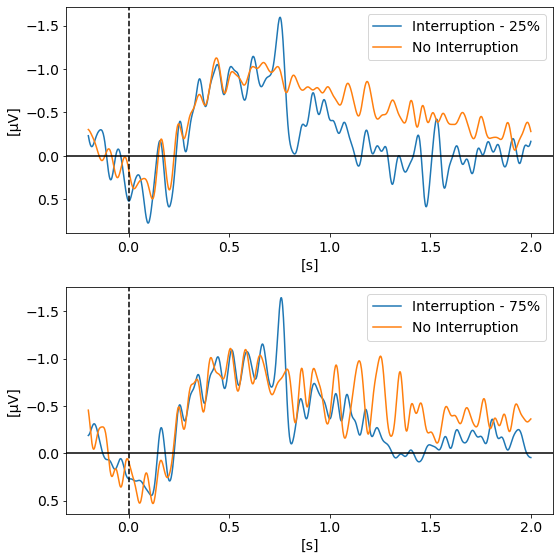

In [4]:
cda_all = dict()

# Get CDA GA
for cond in cda_dict_all[list(cda_dict_all.keys())[0]].keys():
    cda_all[cond] = np.array([])

    for f in cda_dict_all.keys():
        if f == '13_Int3_2017.vhdr': # Skip 13 because fs is 1000hz not 500hz
            continue
            
        perf = 'good'
        
        ldict = cda_dict_all[f][cond]['left']
        rdict = cda_dict_all[f][cond]['right']
        if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):
            cda_dict_cur = (cda_dict_all[f][cond]['left'][perf] + cda_dict_all[f][cond]['right'][perf])/2            
            cda_all[cond] = np.vstack([cda_all[cond], cda_dict_cur]) if len(cda_all[cond]) else cda_dict_cur
        else:
            print("==== SKIPPED: 0 points! (File: {} - Cond: {})".format(str(f), str(cond)))
            
# Plot
plt.rcParams.update({'font.size': 14})

fig, axs = plt.subplots(2, 1, figsize=(8,8))

axs[0].plot(times, cda_all['int25'].mean(0) * 1e6, label='Interruption - 25%')
axs[0].plot(times, cda_all['no_int25'].mean(0) * 1e6, label='No Interruption')
axs[0].axvline(x=0, color='k', linestyle='--')
axs[0].axhline(y=0, color='k', linestyle='-')
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_ylabel('[μV]')
axs[0].set_xlabel('[s]')

axs[1].plot(times, cda_all['int75'].mean(0) * 1e6, label='Interruption - 75%')
axs[1].plot(times, cda_all['no_int75'].mean(0) * 1e6, label='No Interruption')
axs[1].axvline(x=0, color='k', linestyle='--')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_ylabel('[μV]')
axs[1].set_xlabel('[s]')

plt.tight_layout()
fig.savefig("./{}-reprod.png".format(study_id), dpi=300, format='png')

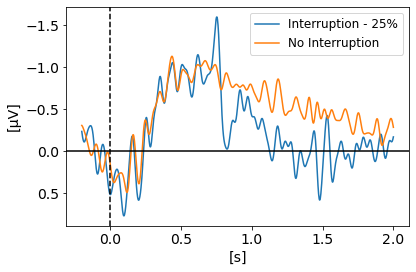

In [9]:
# Plot
plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(6,4))

plt.plot(times, cda_all['int25'].mean(0) * 1e6, label='Interruption - 25%')
plt.plot(times, cda_all['no_int25'].mean(0) * 1e6, label='No Interruption')
plt.axvline(x=0, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-')
plt.gca().invert_yaxis()
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.rcParams.update({'font.size': 14})
plt.ylabel('[μV]')
plt.xlabel('[s]')

plt.tight_layout()
fig.savefig("./{}-CDA1-reprod.png".format(study_id), dpi=300, format='png')

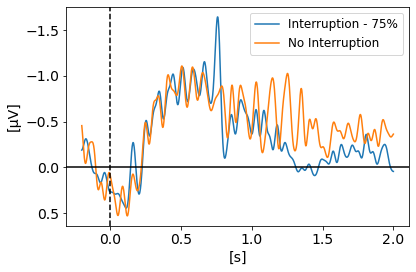

In [10]:
# Plot
plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(6,4))

plt.plot(times, cda_all['int75'].mean(0) * 1e6, label='Interruption - 75%')
plt.plot(times, cda_all['no_int75'].mean(0) * 1e6, label='No Interruption')
plt.axvline(x=0, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-')
plt.gca().invert_yaxis()
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.rcParams.update({'font.size': 14})
plt.ylabel('[μV]')
plt.xlabel('[s]')

plt.tight_layout()
fig.savefig("./{}-CDA2-reprod.png".format(study_id), dpi=300, format='png')

## Save CDA Data

In [18]:
data_pickle = dict()
data_pickle['times'] = times
data_pickle['CDA'] = cda_dict_all
data_pickle['epochs'] = epochs_dict_all
data_pickle['report'] = report
data_pickle['report_perf'] = perf_report_all

with open("{}_clean-20hz.pkl".format(study_id),"wb") as f:
    pickle.dump(data_pickle, f)

## Load CDA Data

In [3]:
with open("{}_clean-20hz.pkl".format(study_id),"rb") as f:
    data_pickle = pickle.load(f)
    
times = data_pickle['times']
cda_dict_all = data_pickle['CDA']
epochs_dict_all = data_pickle['epochs']
report = data_pickle['report']
perf_report_all = data_pickle['report_perf']

len(cda_dict_all)

20

## Analysis - Bad Perf Trials

Text(0.5, 0, '[s]')

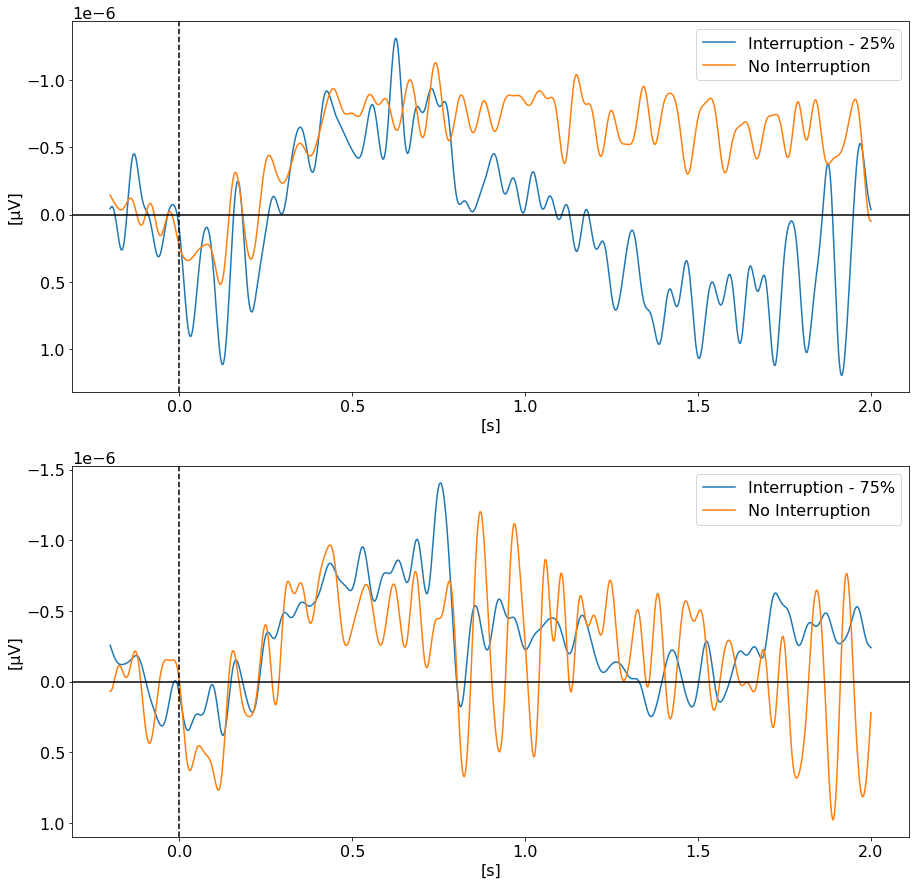

In [21]:
cda_all_bad = dict()

for cond in cda_dict_all[list(cda_dict_all.keys())[0]].keys():
    cda_all_bad[cond] = dict()

    for f in cda_dict_all.keys():
        if f == '13_Int3_2017.vhdr': # Skip 13 because fs is 1000hz not 500hz
            continue
            
        perf = 'bad'
        
        ldict = cda_dict_all[f][cond]['left']
        rdict = cda_dict_all[f][cond]['right']
        if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):            
            cda_dict_cur = (cda_dict_all[f][cond]['left'][perf] + cda_dict_all[f][cond]['right'][perf])/2
            if ~np.isnan(cda_dict_cur[0]):
                cda_all_bad[cond] = np.vstack([cda_all_bad[cond], cda_dict_cur]) if len(cda_all_bad[cond]) else cda_dict_cur
        elif (perf in ldict.keys() and len(ldict[perf])):
            cda_dict_cur = cda_dict_all[f][cond]['left'][perf]
            if ~np.isnan(cda_dict_cur[0]):
                cda_all_bad[cond] = np.vstack([cda_all_bad[cond], cda_dict_cur]) if len(cda_all_bad[cond]) else cda_dict_cur
        elif (perf in rdict.keys() and len(rdict[perf])):
            cda_dict_cur = cda_dict_all[f][cond]['right'][perf]
            if ~np.isnan(cda_dict_cur[0]):
                cda_all_bad[cond] = np.vstack([cda_all_bad[cond], cda_dict_cur]) if len(cda_all_bad[cond]) else cda_dict_cur            
        else:
            print("==== SKIPPED: 0 points! (File: {} - Cond: {})".format(str(f), str(cond)))

# Plot
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(times, cda_all_bad['int25'].mean(0), label='Interruption - 25%')
axs[0].plot(times, cda_all_bad['no_int25'].mean(0), label='No Interruption')
axs[0].axvline(x=0, color='k', linestyle='--')
axs[0].axhline(y=0, color='k', linestyle='-')
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_ylabel('[μV]')
axs[0].set_xlabel('[s]')

axs[1].plot(times, cda_all_bad['int75'].mean(0), label='Interruption - 75%')
axs[1].plot(times, cda_all_bad['no_int75'].mean(0), label='No Interruption')
axs[1].axvline(x=0, color='k', linestyle='--')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_ylabel('[μV]')
axs[1].set_xlabel('[s]')

#plt.savefig("./{}-bad.png".format(study_id), dpi=300, format='png')

## Analysis - Show Spread per subject

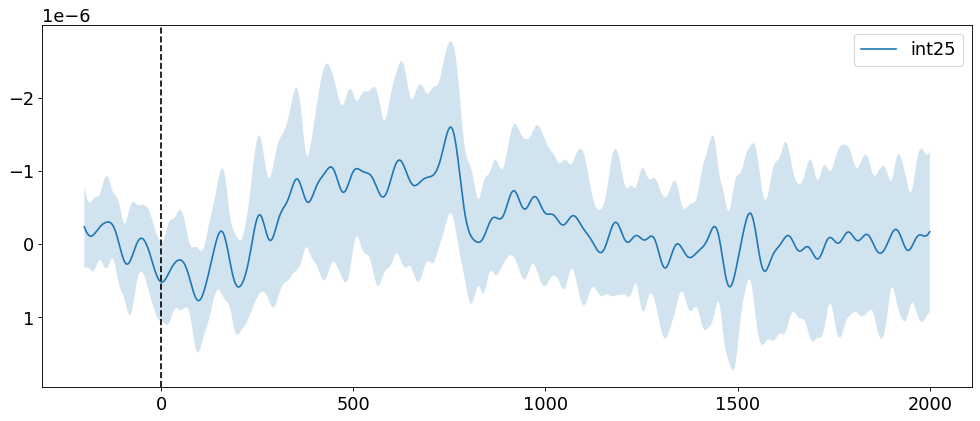

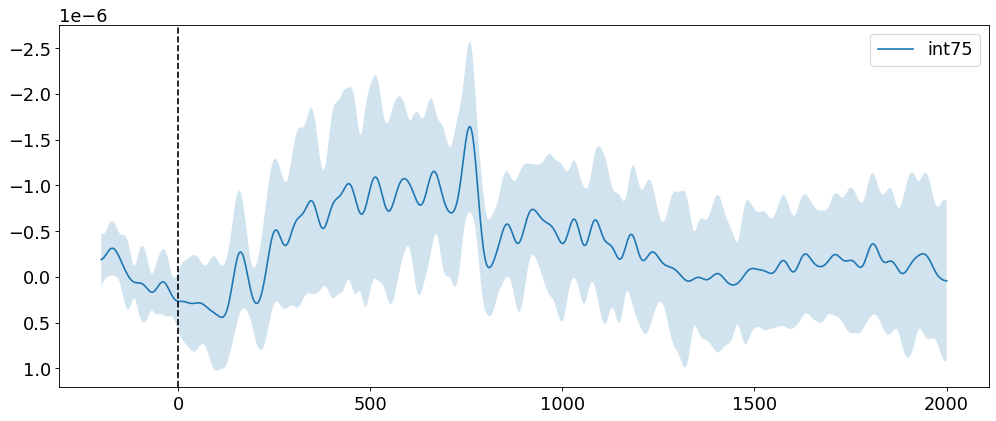

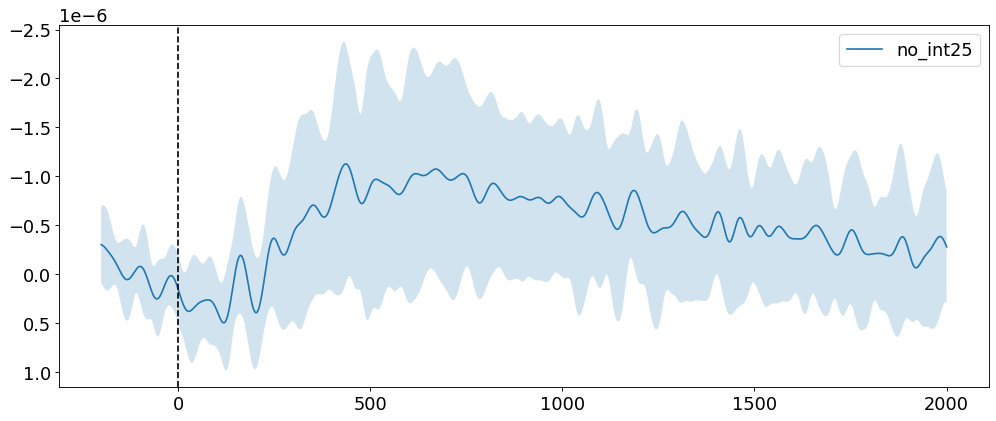

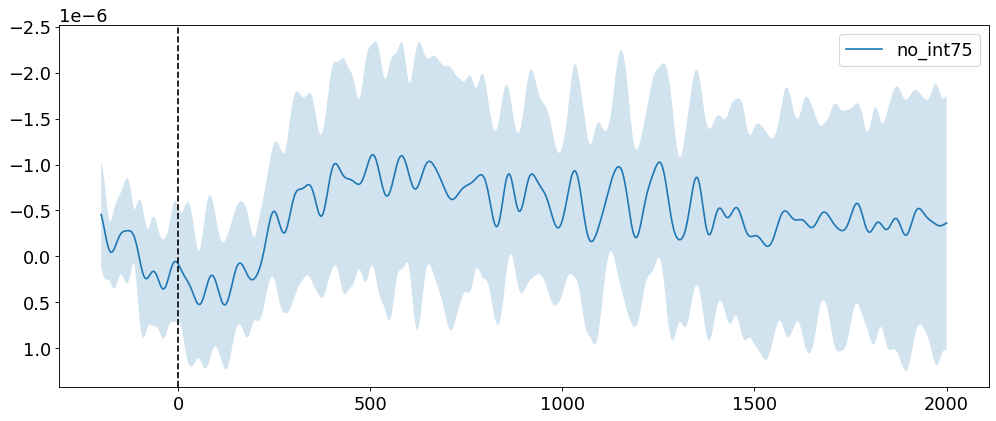

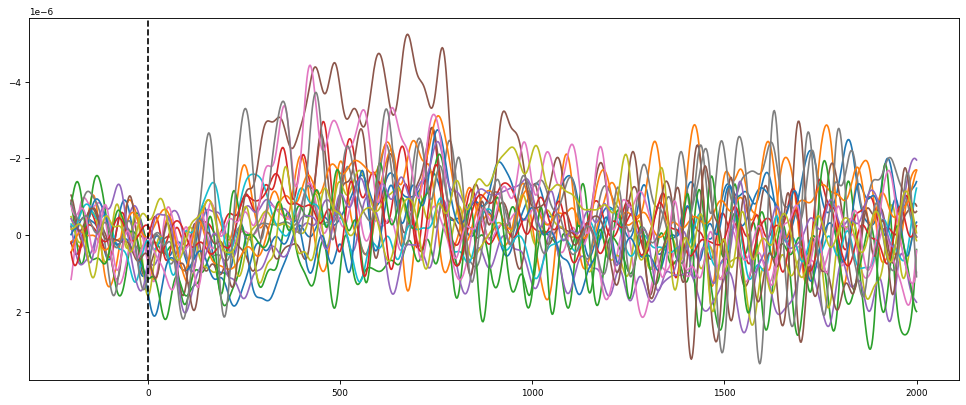

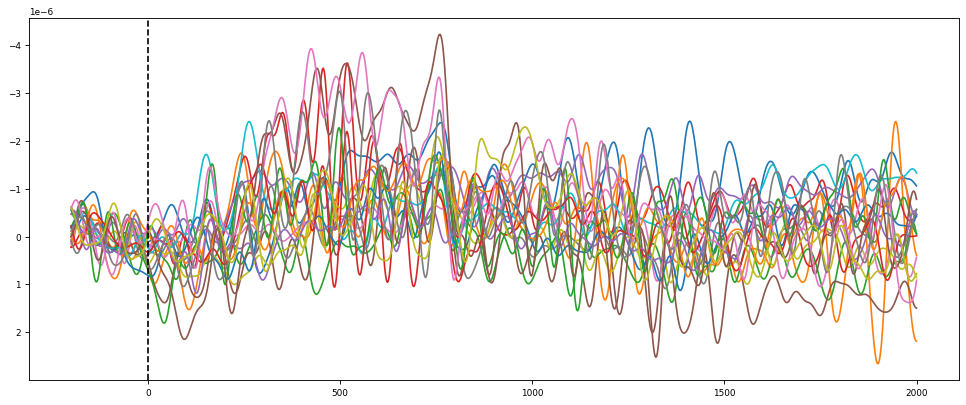

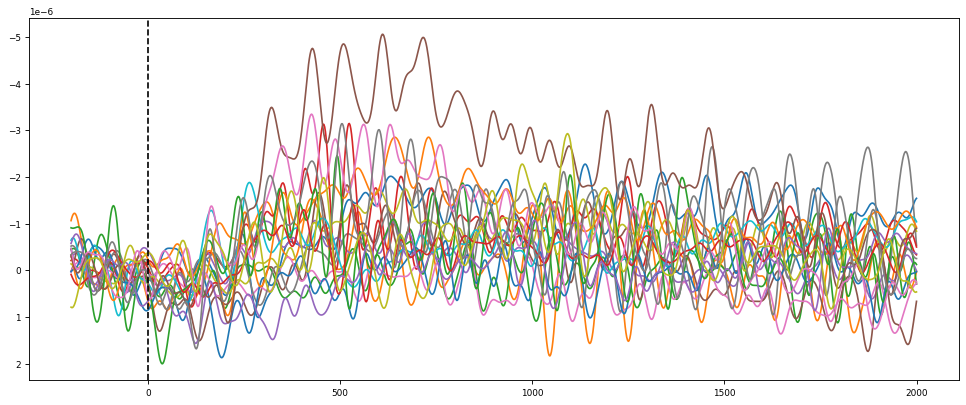

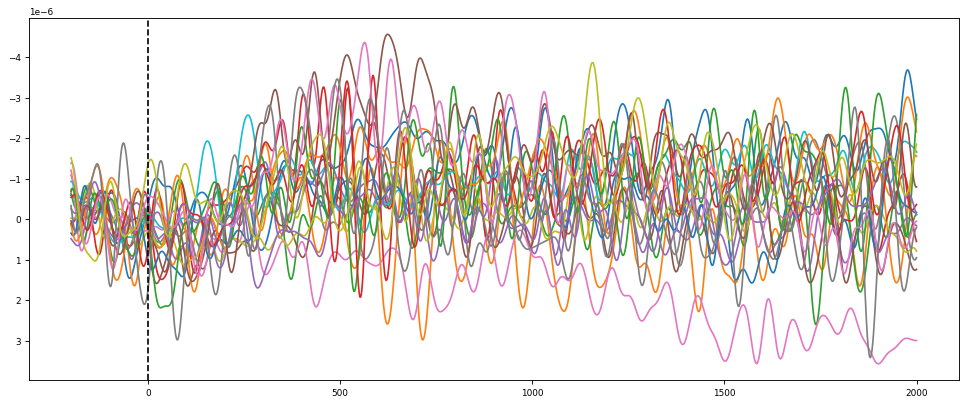

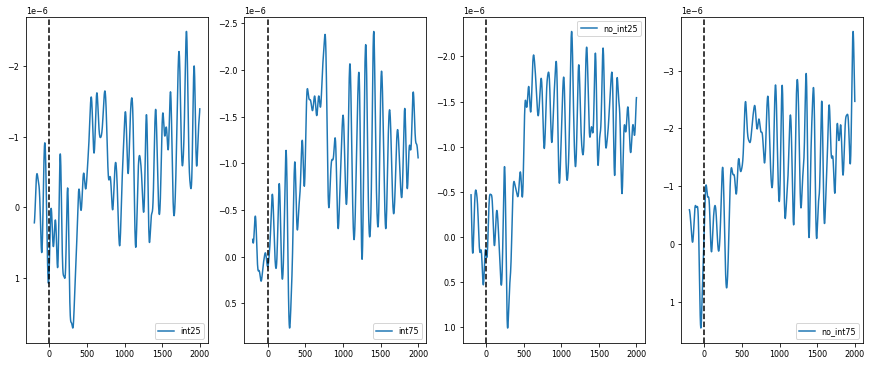

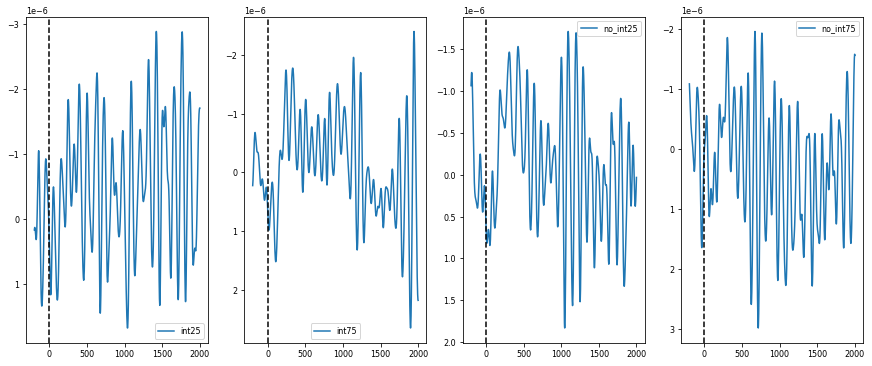

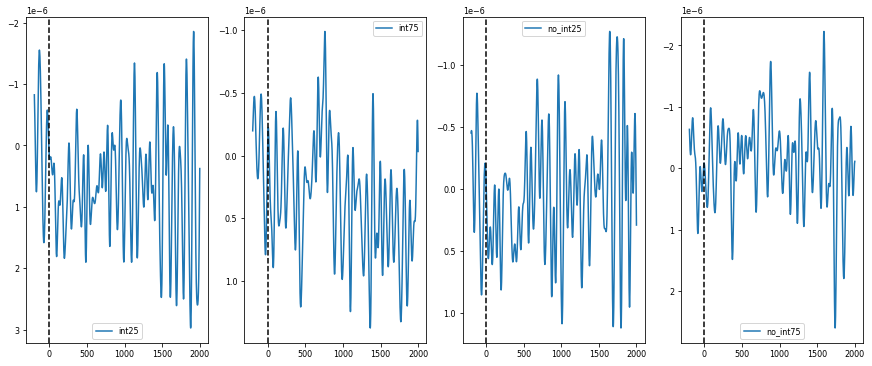

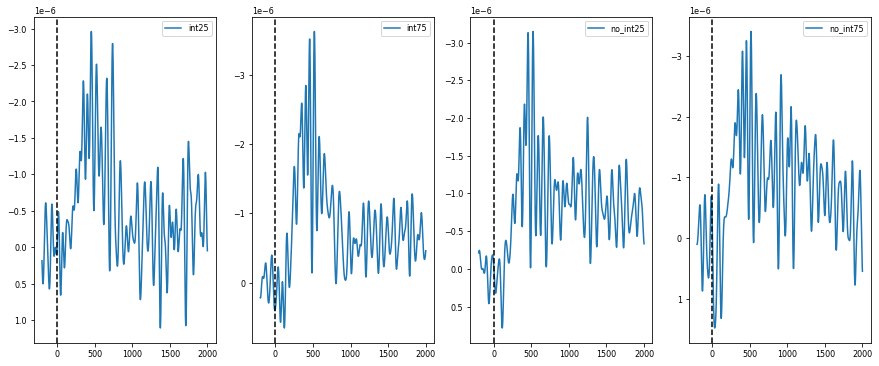

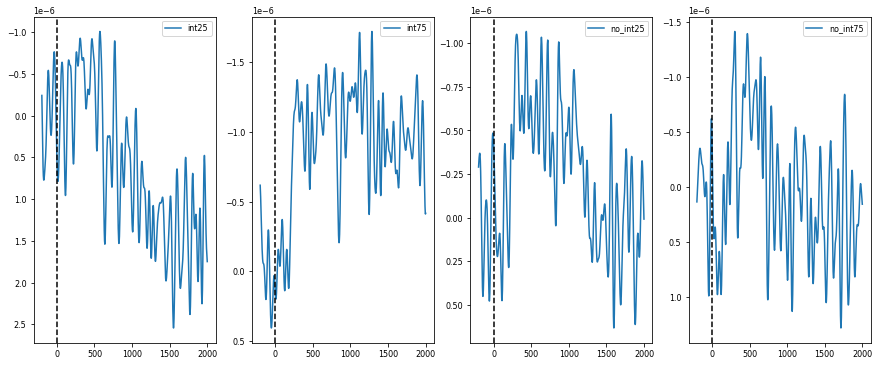

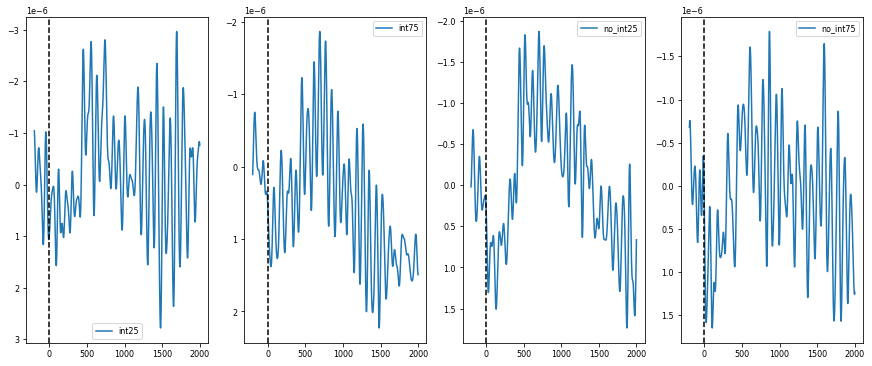

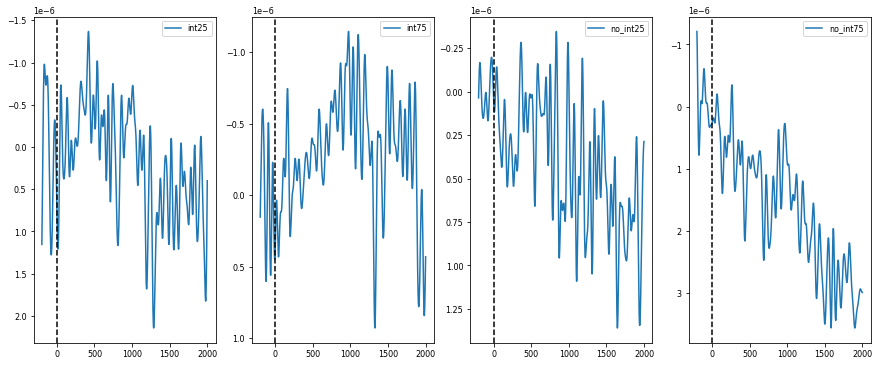

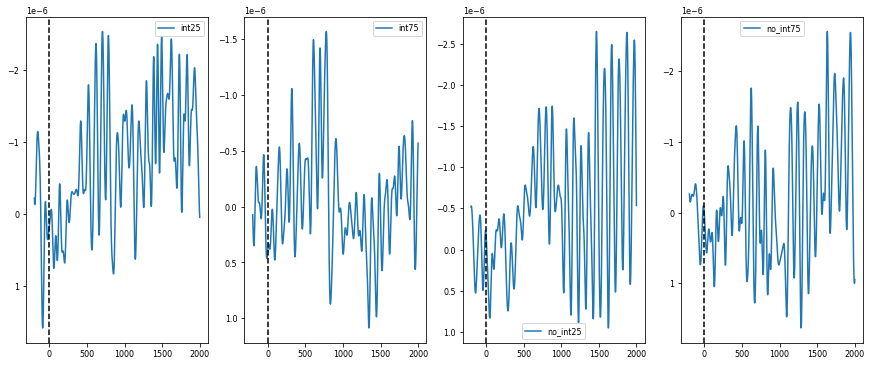

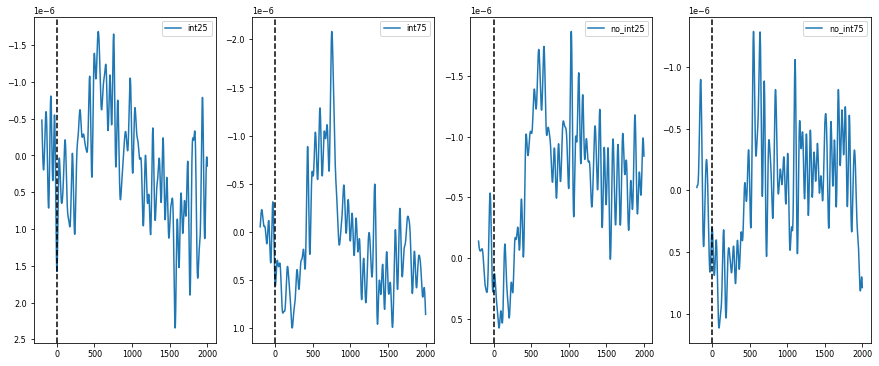

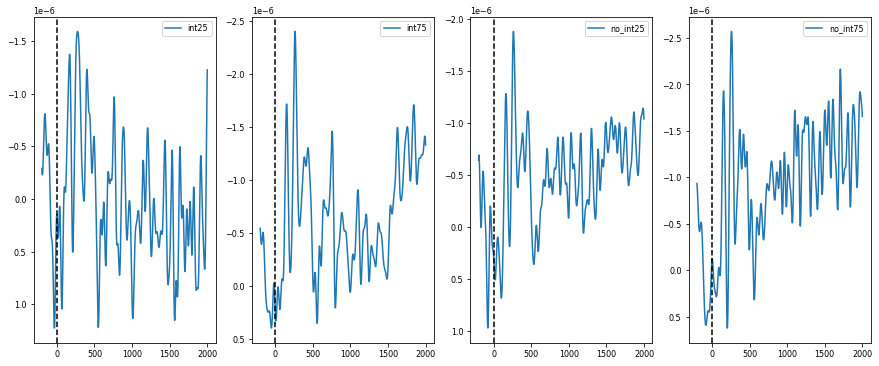

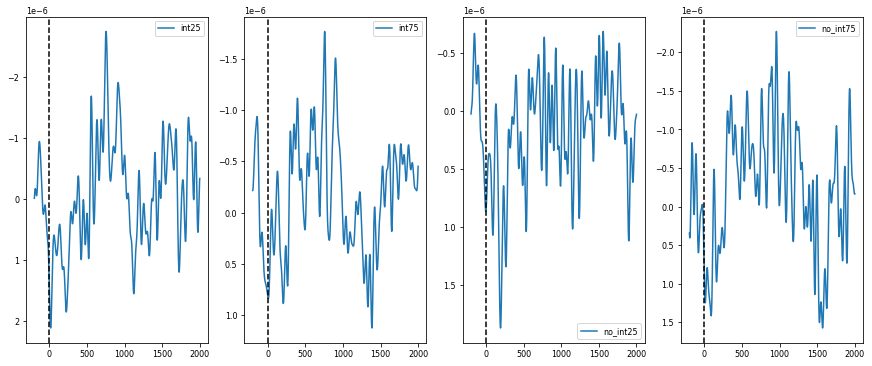

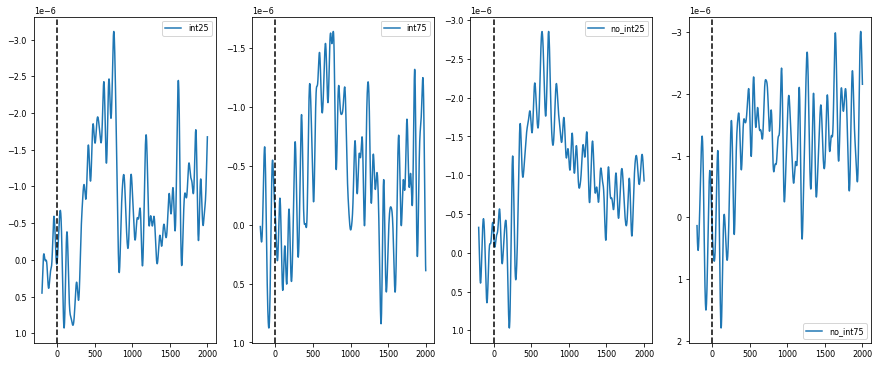

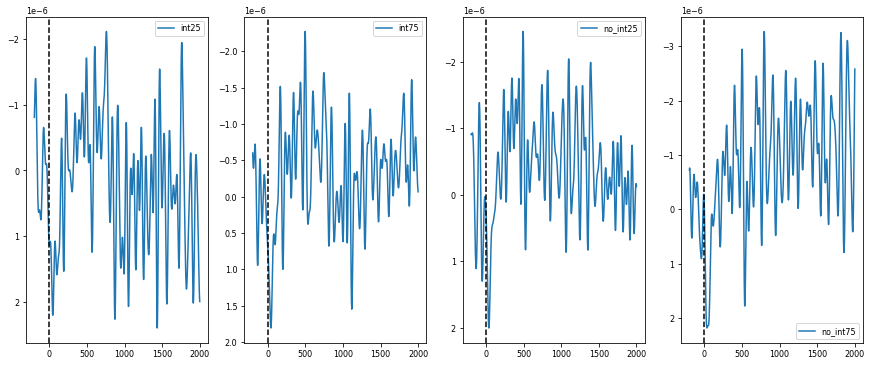

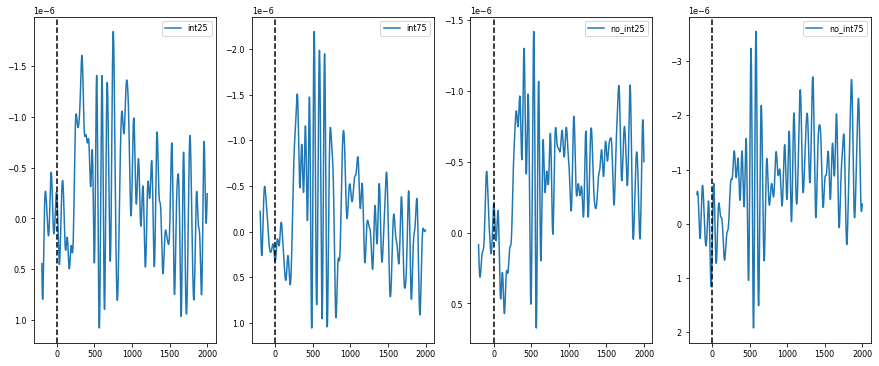

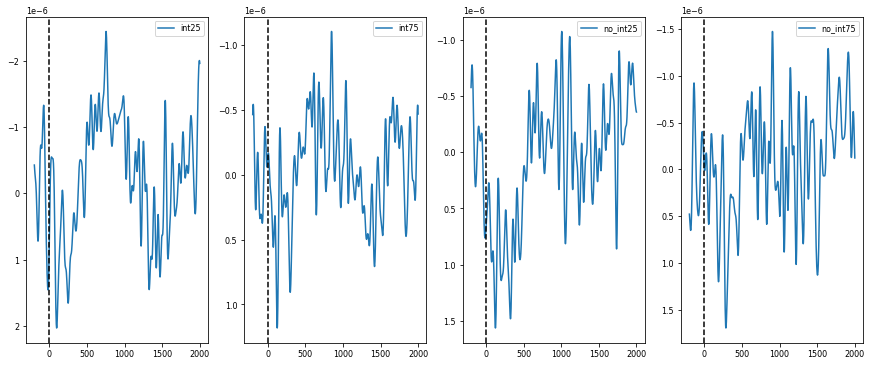

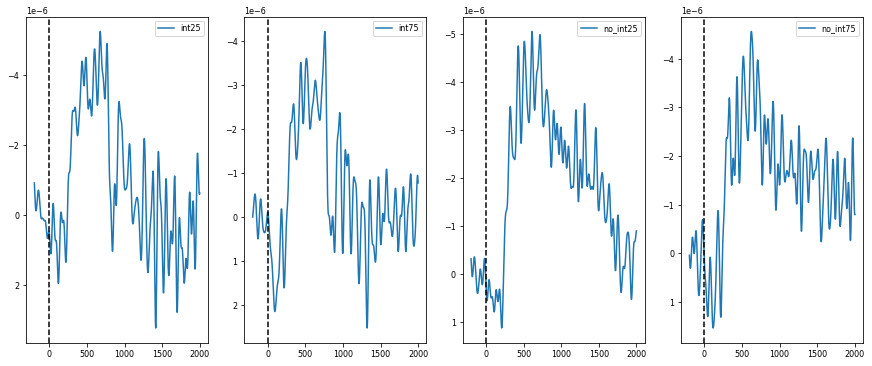

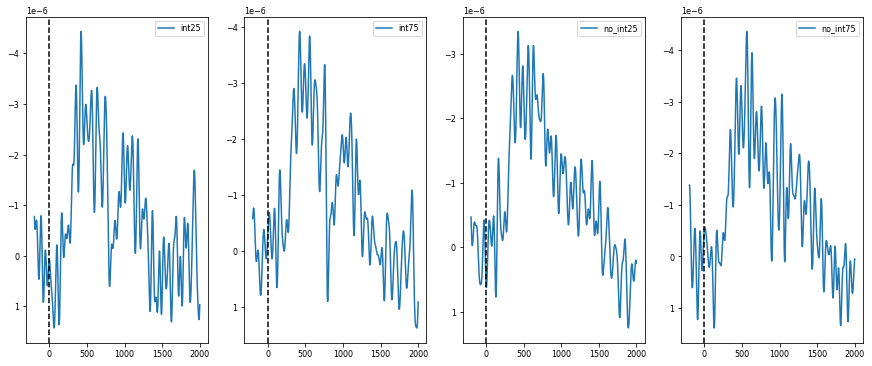

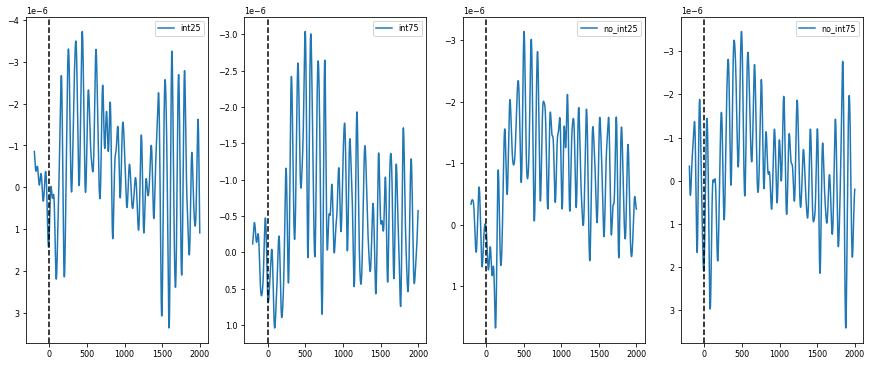

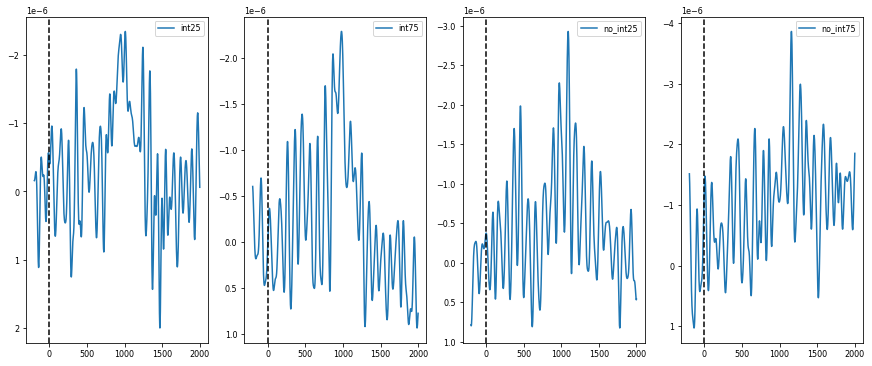

In [24]:
plt.rcParams.update({'font.size': 16})
for cond in conds:
    plt.figure(figsize=(15, 6), dpi=80)
    means = cda_all[cond].mean(0)
    stds = cda_all[cond].std(0)
    plt.plot((times * 1000), means, label=cond)
    plt.fill_between((times * 1000), means-stds,means+stds,alpha=.2)

    plt.axvline(x=0, color='k', linestyle='--')
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

plt.rcParams.update({'font.size': 8})
for cond in conds:
    plt.figure(figsize=(15, 6), dpi=80)
    for i in range(len(cda_all[cond])):
        plt.plot((times * 1000), cda_all[cond][i,:], label='{}'.format(i))

    plt.axvline(x=0, color='k', linestyle='--')
    plt.gca().invert_yaxis()
    #plt.legend()
    plt.show()

plt.rcParams.update({'font.size': 8})
#plt.figure(figsize=(15, 6), dpi=80)
for subject in range(len(cda_all[conds[0]])):
    fig, axs = plt.subplots(1, len(conds), figsize=(15,6))
    for i, cond in enumerate(conds):
        axs[i].plot((times * 1000), cda_all[cond][subject,:], label='{}'.format(cond))
        axs[i].axvline(x=0, color='k', linestyle='--')
        axs[i].invert_yaxis()
        axs[i].legend()
    
#plt.gca().invert_yaxis()
#plt.legend()
plt.show()

## Analysis - Performance Report (CDA per Subject)

In [25]:
report = report.loc[:,~report.columns.duplicated()]

## Subjects: Perf (Good/Bad) vs CDA Amp

Text(0, 0.5, 'Mean CDA Amplitude')

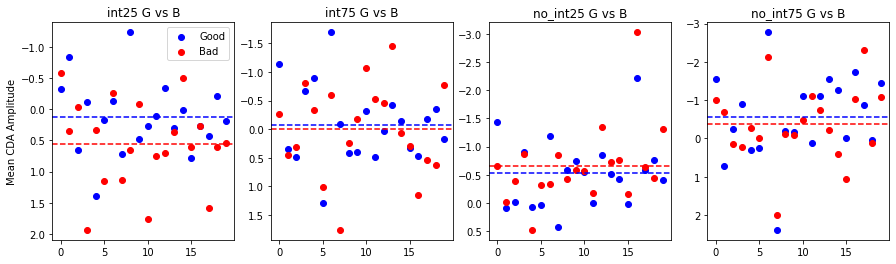

In [26]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,4))

for i, cond in enumerate(conds):
    x = range(len(report['{}-right-good-CDA'.format(cond)]))
    
    # Good
    y = (report['{}-right-good-CDA'.format(cond)] + report['{}-left-good-CDA'.format(cond)]) / 2
    axs[i].scatter(x=x, y=y, color='blue', label='Good')
    axs[i].axhline(y=np.nanmean(y), color='blue', linestyle='--')
    # Bad
    y = (report['{}-right-bad-CDA'.format(cond)] + report['{}-left-bad-CDA'.format(cond)]) / 2
    axs[i].scatter(x=x, y=y, color='red', label='Bad')
    axs[i].axhline(y=np.nanmean(y), color='red', linestyle='--')
    
    axs[i].set_title('{} G vs B'.format(cond))
    axs[i].invert_yaxis()
    
axs[0].legend()
axs[0].set_ylabel('Mean CDA Amplitude')
    

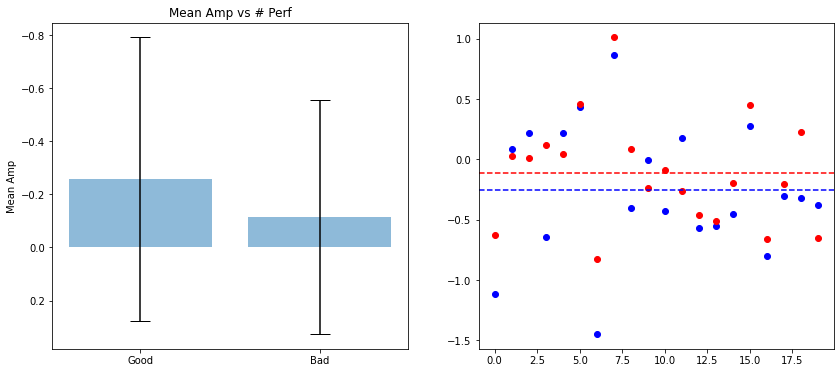

Corr Perf vs CDA Amp: (0.14334226565285801, 0.37756174401164294)


In [27]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Data
goods = np.array(report['good-CDA'])
bads = np.array(report['bad-CDA'])

# Calculate the average
goods_mean = np.nanmean(goods)
bads_mean = np.nanmean(bads)

# Calculate the standard deviation
goods_std = np.nanstd(goods)
bads_std = np.nanstd(bads)

# Define labels, positions, bar heights and error bar heights
labels = ['Good', 'Bad']
x_pos = np.arange(len(labels))
CTEs = [goods_mean, bads_mean]
error = [goods_std, bads_std]

# Build the plot
axs[0].bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
axs[0].set_ylabel('Mean Amp')
axs[0].set_xticks(x_pos)
axs[0].set_xticklabels(labels)
axs[0].set_title('Mean Amp vs # Perf')
axs[0].invert_yaxis()
#ax.yaxis.grid(True)

x = range(len(report['good-CDA']))
axs[1].scatter(x=x, y=report['good-CDA'], color='blue')
axs[1].axhline(y=np.nanmean(report['good-CDA']), color='blue', linestyle='--')
axs[1].scatter(x=x, y=report['bad-CDA'], color='red')
axs[1].axhline(y=np.nanmean(report['bad-CDA']), color='red', linestyle='--')

#plt.tight_layout()
plt.show()

import scipy
x = []
y = []
for p in perfs:
    for value in report['{}-CDA'.format(p)]:
        if p == 'good':
            x.append(1)
        else:
            x.append(2)
        y.append(value)

print('Corr Perf vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

## Subjects: Condition vs CDA Amp

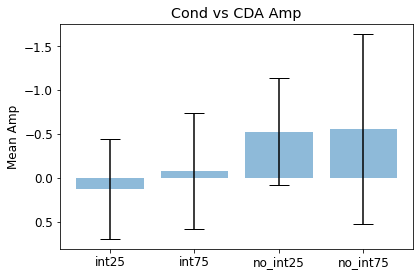

In [28]:
plt.rcParams.update({'font.size': 12})

data_conds = dict()
for cond in conds:
    data_conds[cond] = dict()
    data_conds[cond]['data'] = np.array(report['{}-good-CDA'.format(cond)])
    data_conds[cond]['mean'] = np.nanmean(data_conds[cond]['data'])
    data_conds[cond]['std'] = np.nanstd(data_conds[cond]['data'])
    
labels = conds
x_pos = np.arange(len(labels))
CTEs = [data_conds[cond]['mean'] for cond in conds]
error = [data_conds[cond]['std'] for cond in conds]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean Amp')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Cond vs CDA Amp')
ax.invert_yaxis()
#ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [29]:
# Pearson's Correlation
import scipy
x = []
y = []
for i, ss in enumerate(['int25', 'no_int25']):
    for value in report['{}-good-CDA'.format(ss)]:
        x.append(i)
        y.append(value)

print('Corr int25 & no_int25 vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

x = []
y = []
for i, ss in enumerate(['int75', 'no_int75']):
    for value in report['{}-good-CDA'.format(ss)]:
        x.append(i)
        y.append(value)

print('Corr int75 & no_int75 vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

Corr int25 & no_int25 vs CDA Amp: (-0.4863546006145266, 0.00146270464831901)
Corr int75 & no_int75 vs CDA Amp: (-0.25757163290543306, 0.10858733983764166)


## Subjects: Side (Left/Right) vs CDA Amp

Corr Side vs CDA Amp: (-0.11773411768578584, 0.46935655723333347)


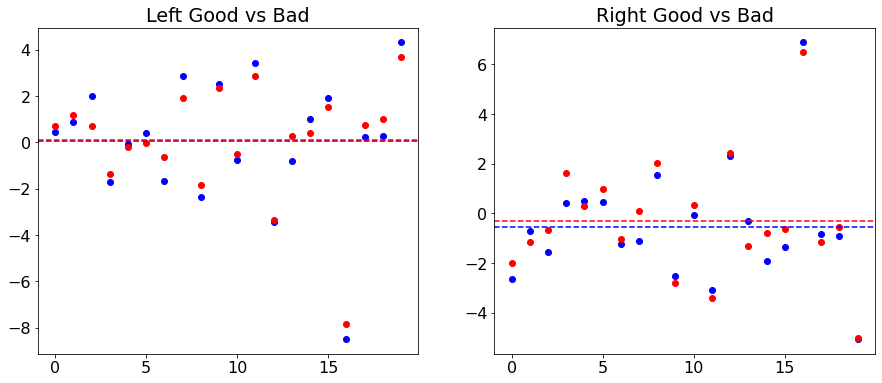

In [30]:
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(1, 2, figsize=(15,6))

x = range(len(report['left-good-CDA']))
y= report['left-good-CDA']
axs[0].scatter(x=x, y=y, color='blue')
axs[0].axhline(y=np.nanmean(y), color='blue', linestyle='--')
x = range(len(report['left-bad-CDA']))
y= report['left-bad-CDA']
axs[0].scatter(x=x, y=y, color='red')
axs[0].axhline(y=np.nanmean(y), color='red', linestyle='--')
axs[0].set_title('Left Good vs Bad')

x = range(len(report['right-good-CDA']))
y= report['right-good-CDA']
axs[1].scatter(x=x, y=y, color='blue')
axs[1].axhline(y=np.nanmean(y), color='blue', linestyle='--')
x = range(len(report['right-bad-CDA']))
y= report['right-bad-CDA']
axs[1].scatter(x=x, y=y, color='red')
axs[1].axhline(y=np.nanmean(y), color='red', linestyle='--')
axs[1].set_title('Right Good vs Bad')

x = []
y = []
for i, side in enumerate(sides):
    for value in report['{}-good-CDA'.format(side)]:
        x.append(i)
        y.append(value)

print('Corr Side vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

## Subjects: Accuracy / Performance vs CDA Amp

Corr Perf Acc ~ int25: (-0.17729866479670764, 0.4545781868005673)
Corr Perf Acc ~ int75: (-0.33205261027649075, 0.15262327372813472)
Corr Perf Acc ~ no_int25: (-0.7725310097187773, 6.551027139080017e-05)
Corr Perf Acc ~ no_int75: (-0.6899796005993407, 0.0007610449822590499)


Text(0, 0.5, 'CDA Mean Amp')

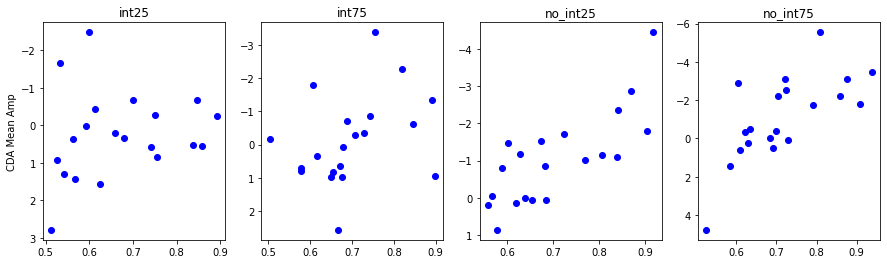

In [31]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,4))

for i, cond in enumerate(conds):
    goods = (report['{}-left-good'.format(cond)] + report['{}-right-good'.format(cond)])/2
    bads = (report['{}-left-bad'.format(cond)] + report['{}-right-bad'.format(cond)])/2
    x = goods / (goods + bads)
    y = report['{}-left-good-CDA'.format(cond)] + report['{}-right-good-CDA'.format(cond)]
    axs[i].scatter(x=x, y=y, color='blue')
    axs[i].invert_yaxis()
    axs[i].set_title('{}'.format(cond))
    
    print('Corr Perf Acc ~ {}: {}'.format(cond, scipy.stats.pearsonr(x,y)))

axs[0].set_ylabel('CDA Mean Amp')

## Trials: Conditions vs Amp

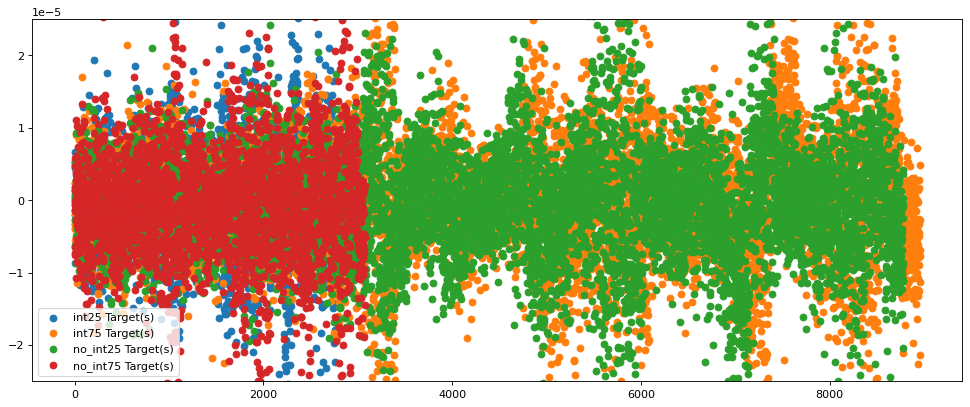

In [32]:
plt.figure(figsize=(15, 6), dpi=80)

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for side in sides:
            for value in perf_report_all[f][cond][side]['good']:
                y1.append(value)
    x1 = range(len(y1))

    plt.scatter(x=x1, y=y1, label='{} Target(s)'.format(cond))

plt.ylim(-2.5*1e-5,2.5*1e-5)
plt.legend()
plt.show()

## Trials: Good vs Bad

Cond = int25 Targets: 2803 Good Perf Trials vs 1352 Bad Perf Trials, with 31 outliers on graph.
Cond = int75 Targets: 8960 Good Perf Trials vs 3855 Bad Perf Trials, with 137 outliers on graph.
Cond = no_int25 Targets: 8785 Good Perf Trials vs 3538 Bad Perf Trials, with 88 outliers on graph.
Cond = no_int75 Targets: 3076 Good Perf Trials vs 1220 Bad Perf Trials, with 40 outliers on graph.


Text(0, 0.5, 'CDA mean amplitude')

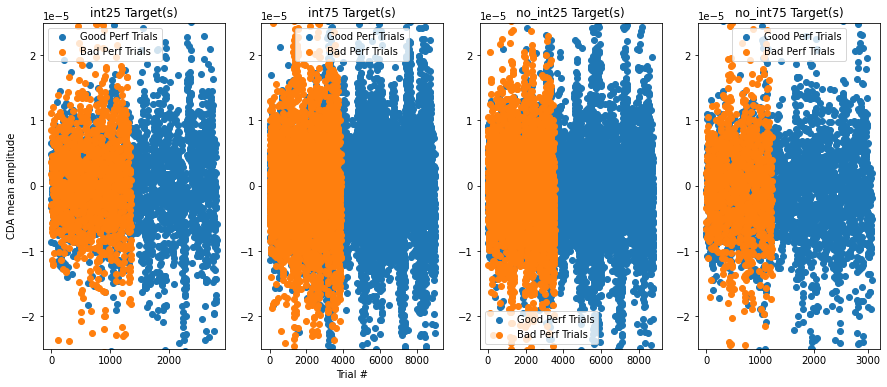

In [33]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,6))

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['left']['good']:
            y1.append(value)
        for value in perf_report_all[f][cond]['right']['good']:
            y1.append(value)
    x1 = range(len(y1))

    y2 = []
    for f in perf_report_all.keys():
        if 'bad' in perf_report_all[f][cond]['left'].keys():
            for value in perf_report_all[f][cond]['left']['bad']:
                y2.append(value)
        if 'bad' in perf_report_all[f][cond]['right'].keys():
            for value in perf_report_all[f][cond]['right']['bad']:
                y2.append(value)
    x2 = range(len(y2))

    axs[i].scatter(x=x1, y=y1, label='Good Perf Trials')
    axs[i].scatter(x=x2, y=y2, label='Bad Perf Trials')
    axs[i].legend()
    axs[i].set_ylim(-2.5*1e-5,2.5*1e-5)
    axs[i].set_title('{} Target(s)'.format(cond))

    nb_outliers = len([val for val in (y1 + y2) if ((val*1e5) > 2.5) or ((val*1e5) < -2.5)])
    print('Cond = {} Targets: {} Good Perf Trials vs {} Bad Perf Trials, with {} outliers on graph.'.format(cond, len(y1), len(y2), nb_outliers))

axs[1].set_xlabel('Trial #')
axs[0].set_ylabel('CDA mean amplitude')
#fig.tight_layout(pad=1.0)

## Trials: Left vs Right

Cond = int25 Targets: 1399 Good Left Trials vs 1404 Good Right Trials, with 22 outliers on graph
Cond = int75 Targets: 4478 Good Left Trials vs 4482 Good Right Trials, with 88 outliers on graph
Cond = no_int25 Targets: 4394 Good Left Trials vs 4391 Good Right Trials, with 62 outliers on graph
Cond = no_int75 Targets: 1538 Good Left Trials vs 1538 Good Right Trials, with 24 outliers on graph


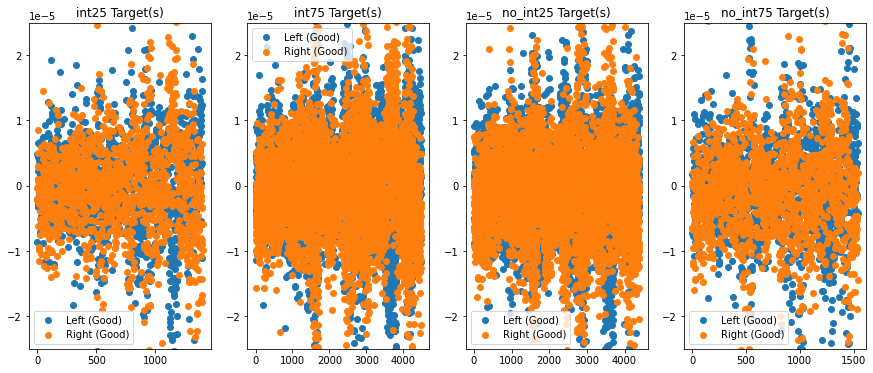

In [34]:
fig, axs = plt.subplots(1, len(conds), figsize=(15,6))

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['left']['good']:
            y1.append(value)
    x1 = range(len(y1))

    y2 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['right']['good']:
            y2.append(value)
    x2 = range(len(y2))

    axs[i].scatter(x=x1, y=y1, label='Left (Good)')
    axs[i].scatter(x=x2, y=y2, label='Right (Good)')
    axs[i].legend()
    axs[i].set_title('{} Target(s)'.format(cond))
    axs[i].set_ylim(-2.5*1e-5,2.5*1e-5)

    nb_outliers = len([val for val in (y1 + y2) if ((val*1e5) > 2.5) or ((val*1e5) < -2.5)])
    print('Cond = {} Targets: {} Good Left Trials vs {} Good Right Trials, with {} outliers on graph'.format(cond, len(y1), len(y2), nb_outliers))
        

# Extra Utils (to be removed)

In [35]:
import collections

total = 0

print("---------------------------")
for i in range(20):
    frequency = collections.Counter(beh_accs[i])
    events_frequency = dict(frequency)
    print("Subject #{}: \t {} Good \t|   {} Bad".format(i, frequency[1.0], frequency[0.0]))
print("---------------------------")
frequency[accs[0]]


---------------------------
Subject #0: 	 1629 Good 	|   291 Bad
Subject #1: 	 1084 Good 	|   830 Bad
Subject #2: 	 1157 Good 	|   763 Bad
Subject #3: 	 1725 Good 	|   195 Bad
Subject #4: 	 1152 Good 	|   768 Bad
Subject #5: 	 1301 Good 	|   619 Bad
Subject #6: 	 1523 Good 	|   397 Bad
Subject #7: 	 1040 Good 	|   880 Bad
Subject #8: 	 1136 Good 	|   624 Bad
Subject #9: 	 1124 Good 	|   796 Bad
Subject #10: 	 1620 Good 	|   300 Bad
Subject #11: 	 1255 Good 	|   665 Bad
Subject #12: 	 1346 Good 	|   574 Bad
Subject #13: 	 1439 Good 	|   481 Bad
Subject #14: 	 1316 Good 	|   604 Bad
Subject #15: 	 1267 Good 	|   653 Bad
Subject #16: 	 1739 Good 	|   181 Bad
Subject #17: 	 1477 Good 	|   443 Bad
Subject #18: 	 1302 Good 	|   618 Bad
Subject #19: 	 1147 Good 	|   773 Bad
---------------------------


NameError: name 'accs' is not defined

In [ ]:
directory_path = '/Volumes/Nick - Data/CDA Datasets/Hakim 2020/Experiment 2/EegData/'
directory_path_BEH = '/Volumes/Nick - Data/CDA Datasets/Hakim 2020/Experiment 2/Analysis_GrandAverages/'

# ------------------------
# 0. -- Load BEH File --
# ------------------------
behavfilepath = directory_path_BEH + 'allSubsBehData.mat'
mat = mat73.loadmat(behavfilepath)
beh_accs = mat['allsubs']['acc']
beh_conds = mat['allsubs']['cond']
beh_sides = mat['allsubs']['side']
beh_subjects = mat['subjects']

for i in range(20):
    print('Subject: {} | Accs: {} | Conds: {} | Sides: {}'.format(beh_subjects[i], len(beh_accs[i]), len(beh_conds[i]), len(beh_sides[i])))
for i in range(20):
    print('Subject: {} | Accs: {} | Conds: {} | Sides: {}'.format(beh_subjects[i], beh_accs[i], beh_conds[i], beh_sides[i]))

In [ ]:
import collections

total = 0

frequency = collections.Counter(events[0][:,2])
events_frequency = dict(frequency)

print('Max Events in File...')
print("---------------------------")
for e in set(events[0][:,2]):
    print("{}: \t\t{}".format(e, frequency[e]))
print("---------------------------")

In [ ]:
event_id = 0
for e in events[0]:
       if e[2] in triggers_all: # Find relevant trials (events)
            cur_cond = conds_beh[int(beh_conds[0][event_id])]
            cur_side = sides_beh[int(beh_sides[0][event_id])]
            new_trigger = np.intersect1d(triggers[cur_cond], triggers[cur_side])[0]
            e[2] = new_trigger
            print('Trial #{}: {} & {} -> {}'.format(event_id+1, cur_cond, cur_side, new_trigger))
            event_id = event_id + 1